In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# to reduce amount of repeating code from notebook to another there is a lib of
#often used functions called
import sys
sys.path.insert(0, "C:/workspace/data-science/perpetual/second_investigation_wave")
from data_transformers import *

# Collecting FTX prices for 2021 minutewise

In [2]:
eth_ftx_price_df = pd.read_csv("eth_ftx_price_2021.csv")
eth_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

btc_ftx_price_df = pd.read_csv("btc_ftx_price_2021.csv")
btc_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

perp_ftx_price_df = pd.read_csv("perp_ftx_price_2021.csv")
perp_ftx_price_df.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
eth_ftx_price_df["datetime"] = pd.to_datetime(eth_ftx_price_df["time"])
eth_ftx_price_df["day_of_year"] = eth_ftx_price_df["datetime"].dt.dayofyear
eth_ftx_price_df["hour"] = eth_ftx_price_df["datetime"].dt.hour
eth_ftx_price_df["minute"] = eth_ftx_price_df["datetime"].dt.minute
eth_ftx_price_df.drop(columns=["startTime", "time"], inplace=True)
eth_ftx_price_df

,open,high,low,close,volume,datetime,day_of_year,hour,minute
0,737.28,737.91,736.90,737.80,9917.16625,2021-01-01 00:00:00,1,0,0
1,737.80,739.92,737.80,739.53,30086.73403,2021-01-01 00:01:00,1,0,1
2,739.53,740.00,738.21,738.75,257.16222,2021-01-01 00:02:00,1,0,2
3,738.75,739.10,738.14,738.14,185.36104,2021-01-01 00:03:00,1,0,3
4,738.14,738.63,737.62,737.78,178.66611,2021-01-01 00:04:00,1,0,4
...,...,...,...,...,...,...,...,...,...
525875,3677.30,3678.90,3677.20,3677.40,96718.27870,2021-12-31 23:56:00,365,23,56
525876,3677.40,3679.30,3677.40,3677.70,35194.77190,2021-12-31 23:57:00,365,23,57
525877,3677.70,3678.60,3672.60,3675.50,293073.79940,2021-12-31 23:58:00,365,23,58
525878,3675.50,3678.60,3675.20,3676.50,138598.98440,2021-12-31 23:59:00,365,23,59


In [4]:
btc_ftx_price_df["datetime"] = pd.to_datetime(btc_ftx_price_df["time"])
btc_ftx_price_df["day_of_year"] = btc_ftx_price_df["datetime"].dt.dayofyear
btc_ftx_price_df["hour"] = btc_ftx_price_df["datetime"].dt.hour
btc_ftx_price_df["minute"] = btc_ftx_price_df["datetime"].dt.minute
btc_ftx_price_df.drop(columns=["time"], inplace=True)
btc_ftx_price_df

,open,high,low,close,volume,datetime,day_of_year,hour,minute
0,28965.0,29014.5,28960.0,29014.5,1.468796e+05,2021-01-01 00:00:00,1,0,0
1,29014.5,29070.5,29014.5,29065.5,5.276008e+05,2021-01-01 00:01:00,1,0,1
2,29065.5,29066.0,29018.0,29041.5,1.813415e+05,2021-01-01 00:02:00,1,0,2
3,29041.5,29050.5,29022.0,29028.0,3.602541e+05,2021-01-01 00:03:00,1,0,3
4,29028.0,29040.5,29021.5,29022.0,2.229805e+05,2021-01-01 00:04:00,1,0,4
...,...,...,...,...,...,...,...,...,...
525872,46244.0,46270.0,46238.0,46242.0,1.430735e+05,2021-12-31 23:56:00,365,23,56
525873,46242.0,46269.0,46236.0,46237.0,1.526918e+05,2021-12-31 23:57:00,365,23,57
525874,46237.0,46237.0,46136.0,46179.0,1.191280e+06,2021-12-31 23:58:00,365,23,58
525875,46179.0,46225.0,46177.0,46199.0,2.645854e+05,2021-12-31 23:59:00,365,23,59


In [5]:
perp_ftx_price_df["datetime"] = pd.to_datetime(perp_ftx_price_df["time"])
perp_ftx_price_df["day_of_year"] = perp_ftx_price_df["datetime"].dt.dayofyear
perp_ftx_price_df["hour"] = perp_ftx_price_df["datetime"].dt.hour
perp_ftx_price_df["minute"] = perp_ftx_price_df["datetime"].dt.minute
perp_ftx_price_df.drop(columns=["time"], inplace=True)
perp_ftx_price_df

,open,high,low,close,volume,datetime,day_of_year,hour,minute
0,4.609,4.624,4.609,4.624,1120.2155,2021-03-01 00:00:00,60,0,0
1,4.624,4.655,4.624,4.645,937.8225,2021-03-01 00:01:00,60,0,1
2,4.645,4.648,4.635,4.635,321.7042,2021-03-01 00:02:00,60,0,2
3,4.635,4.635,4.629,4.629,481.6378,2021-03-01 00:03:00,60,0,3
4,4.629,4.629,4.620,4.624,591.0764,2021-03-01 00:04:00,60,0,4
...,...,...,...,...,...,...,...,...,...
525878,4.690,4.694,4.690,4.694,22.0618,2022-02-28 23:56:00,59,23,56
525879,4.694,4.707,4.694,4.699,44.6969,2022-02-28 23:57:00,59,23,57
525880,4.699,4.712,4.699,4.712,236.5224,2022-02-28 23:58:00,59,23,58
525881,4.712,4.712,4.708,4.708,0.0000,2022-02-28 23:59:00,59,23,59


# Define plots

In [6]:
def plot_minutewise_pnl_to_high_low_price(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                   perp_minutewise_price_df: pd.DataFrame, token_name: str):
    """show minutewise pnl results respective to the minutewise mean price from FTX and Perpetual platforms

    Args:
    changes_token_df (pd.DataFrame): position changes with specific token
    ftx_price_df (pd.DataFrame): FTX high and low token price story per minute
    perp_minutewise_price_df (pd.DataFrame): Perpetual high and low price story per minute
    token_name (str): name of the token
    """
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]

    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]).min(
                                                                  ).sort_values(by=["day_of_year", "hour", "minute"])

    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]

    fig, ax = plt.subplots(figsize=(25, 10))
    ax2 = ax.twinx()
    ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
          label="collected profits per minute")
    ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
          label="collected losses per minute")

    ax2.plot(ftx_price_df["datetime"], ftx_price_df["high"], color='b', label='FTX high price')
    ax2.plot(ftx_price_df["datetime"], ftx_price_df["low"], color='midnightblue', label='FTX low price')
    ax2.plot(perp_minutewise_price_df["time"], perp_minutewise_price_df["high"], color='orange', label="Perpetual high price")
    ax2.plot(perp_minutewise_price_df["time"], perp_minutewise_price_df["low"], color='orangered', label="Perpetual low price")

    max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
    min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax.set_title("Daily sum of profits and losses relative to daily mean price for " + token_name + "/USD")
    fig.legend()
    plt.xticks(rotation=45)
    plt.show()

    
        
def plot_minutewise_pnl_to_mean_price(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                   perp_minutewise_price_df: pd.DataFrame, token_name: str):
    """show cumulative pnl respective to the daily mean price of the token with prices from
    Uniswap, Perpetual and FTX platforms

    Args:
    changes_token_df (pd.DataFrame): position changes for specific token during specific year
    ftx_price_df (pd.DataFrame): FTX-based price of token in USD
    perp_minutewise_price_df (pd.DataFrame): Perpetual price of token in USD
    token_name (str): name of the token
    """
    #      -------------------------          data preparation stage      ------------------------------------------------
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]

    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]
                                                                                       ).min().sort_values(by=["day_of_year",
                                                                                                     "hour", "minute"])

    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]
    #      ----------------------------------------------------------------------------------------------------------------

    #      ------------------------------     making a chart       --------------------------------------------------------
    fig, ax = plt.subplots(figsize=(25, 10))
    ax2 = ax.twinx()
    ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
          label="collected profits per minute")
    ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
          label="collected losses per minute")
    ax2.plot(ftx_price_df["datetime"], (ftx_price_df["high"] + ftx_price_df["low"]) / 2, color='b', label='FTX price')
    ax2.plot(perp_minutewise_price_df["time"], (perp_minutewise_price_df["high"] + perp_minutewise_price_df["low"]) / 2, 
          color='orange', label="Perpetual price")

    max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
    min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax.set_title("Daily sum of profits and losses relative to daily mean price for " + token_name + "/USD")
    fig.legend()
    plt.xticks(rotation=45)
    plt.show()
       
     
    
def plot_minutewise_pnl_to_mean_price_difference(changes_token_df: pd.DataFrame, ftx_price_df: pd.DataFrame, 
                                                 perp_minutewise_price_df: pd.DataFrame, token_name: str, separate_plots: bool=False,
                                                 xsize: int=25, ysize: int=10):
    """show cumulative pnl respective to the daily mean price of the token with prices from
    Uniswap, Perpetual and FTX platforms

    Args:
    changes_token_df (pd.DataFrame): position changes for specific token during specific year
    ftx_price_df (pd.DataFrame): FTX-based price of token in USD
    perp_minutewise_price_df (pd.DataFrame): Perpetual price of token in USD
    token_name (str): name of the token
    separate_plots (bool): is it required to separate price difference plot and
                        pnl plot or it can be shown in one. Default is False
    """
    #      -------------------------          data preparation stage      ------------------------------------------------
    changes_year_token_trader_df = changes_token_df[["day_of_year", "hour", "minute", "trader", "realized_pnl"]
                                             ].groupby(["day_of_year", "hour", "minute"]).sum()

    positive_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] >= 0]
    negative_changes_year_token_trader_df = changes_year_token_trader_df[changes_year_token_trader_df["realized_pnl"] < 0]
    positive_changes_minutewise_sum = positive_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])
    negative_changes_minutewise_sum = negative_changes_year_token_trader_df.groupby(["day_of_year", "hour", "minute"]).sum(
                                                                                ).sort_values(by=["day_of_year", 
                                                                                                     "hour", "minute"])

    timestamps_df = changes_token_df[["day_of_year", "hour", "minute", "time"]].groupby(["day_of_year", "hour", "minute"]
                                                                                       ).min().sort_values(by=["day_of_year",
                                                                                                     "hour", "minute"])

    # sum extracted by traders profits and losses per each minute separately                                                                   
    positive_changes_minutewise_sum = positive_changes_minutewise_sum.join(timestamps_df)
    positive_changes_minutewise_sum = positive_changes_minutewise_sum[positive_changes_minutewise_sum["realized_pnl"] != 0]
    negative_changes_minutewise_sum = negative_changes_minutewise_sum.join(timestamps_df)
    negative_changes_minutewise_sum = negative_changes_minutewise_sum[negative_changes_minutewise_sum["realized_pnl"] != 0]

    # combine price stories of the FTX and Perpetual
    perp_ftx_price_df = ftx_price_df.join(perp_minutewise_price_df.rename(columns={"high": "perp_high", "low": "perp_low"}))
    perp_ftx_price_df.dropna(inplace=True)
    #      -----------------------------------------------------------------------------------------------------------------

    #      ---------------------------------------   make a chart  ---------------------------------------------------------
    if not separate_plots:
        fig, ax = plt.subplots(figsize=(xsize, ysize))
        ax2 = ax.twinx()
        ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
             label="collected profits per minute")
        ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
             label="collected losses per minute")
        ax2.plot(perp_ftx_price_df["time"], ((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                         (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2),
             color='magenta', linestyle=":", label="price difference Perp and FTX")

        max_pnl = abs(positive_changes_minutewise_sum["realized_pnl"].max())
        min_pnl = abs(negative_changes_minutewise_sum["realized_pnl"].min())

        max_positive_price_diff = abs((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                                (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2).max()
        max_negative_price_diff = abs((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                                (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2).min()
        max_price_diff = max_positive_price_diff if max_positive_price_diff > max_negative_price_diff else max_negative_price_diff

        pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl

        ax.set_xlabel("Day of year")
        ax.set_ylabel("PnL in USD")
        ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
        ax2.set_ylim(-max_price_diff * 1.05, max_price_diff * 1.05)
        ax2.set_ylabel("Count of traders")
        ax.set_title("Daily sum of profits and losses relative to daily mean price difference for " + token_name + "/USD")
        fig.legend()
        plt.xticks(rotation=45)
        plt.show()
        return
    else:
        # make a preparation of the overall chart
        fig = plt.figure(figsize=(xsize, ysize))
        
        # make first half of chart with pnl
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(positive_changes_minutewise_sum["time"], positive_changes_minutewise_sum['realized_pnl'], color='g', 
             label="collected profits per minute")
        ax.plot(negative_changes_minutewise_sum["time"], negative_changes_minutewise_sum['realized_pnl'], color='r', 
             label="collected losses per minute")
        ax.set_xlabel("time")
        ax.set_ylabel("pnl in USD")
        ax.legend()
        plt.xticks(rotation=45)
        
        # make second half of chart with price difference
        ax = fig.add_subplot(1, 2, 2)
        ax.plot(perp_ftx_price_df["time"], ((perp_ftx_price_df["perp_high"] + perp_ftx_price_df["perp_low"]) / 2 -
                                         (perp_ftx_price_df["high"] + perp_ftx_price_df["low"]) / 2),
             color='magenta', linestyle=":", label="price difference (Perp price - FTX)")
        ax.set_xlabel("time")
        ax.set_ylabel("price difference in USD")
        ax.legend()
        plt.xticks(rotation=45)
        
        fig.tight_layout()
        plt.show()
        return
        #      --------------------------------------------------------------------------------------------------------------------


# Read changes opens closes

In [7]:
changes_opens_closes_df = pd.read_csv("changes_opens_closes_df.csv")
changes_opens_closes_df.drop(columns=["Unnamed: 0"], inplace=True)
changes_opens_closes_df.sort_values(by=["timestamp", "tx_change_version", "open_id"], inplace=True)
changes_opens_closes_df.reset_index(inplace=True)
changes_opens_closes_df.drop(columns=["index"], inplace=True)
changes_opens_closes_df

,id,trader,amm,margin,position_notional,exchanged_position_size,fee,position_size_after,realized_pnl,unrealized_pnl_after,bad_debt,liquidation_penalty,spot_price,funding_payment,block_number,timestamp,amm_name,tx_change_version,time,open_id
0,0x0e824c5f4e27ba5f29b8791e25e76e732783b25bba44...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,6816.007869,20448.023608,34.908392,20.448024,34.908392,0.000000e+00,0.000000,0.0,0.0,586.786590,0.000000,13508290,1607915765,ETH/USDC,6,2020-12-14 03:16:05,1.0
1,0xeebbca404104c295253184426d13273fcafcb7886773...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x8d22f1a9dce724d8c1b4c688d75f17a2fe2d32df,13632.015738,20448.023608,34.786745,20.448024,69.695137,0.000000e+00,71.380545,0.0,0.0,588.836755,0.000000,13508290,1607915765,ETH/USDC,13,2020-12-14 03:16:05,1.0
2,0x06d54c4ad4bfff493051ef548557f4fa0c76fb2dd678...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,5552.445854,16657.337561,0.872710,16.657338,0.872710,0.000000e+00,0.000000,0.0,0.0,19120.287600,0.000000,13508290,1607915765,BTC/USDC,20,2020-12-14 03:16:05,1.0
3,0xe9d804889de5a27a356777a588d6c018e55fa1cae61c...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,11114.600000,16686.462439,0.871187,16.686462,1.743896,0.000000e+00,58.249669,0.0,0.0,19187.208607,0.000000,13508954,1607919105,BTC/USDC,6,2020-12-14 04:11:45,1.0
4,0xea81e16520eae51395b4627365487daa2013df876ef3...,0x1a48776f436bcdaa16845a378666cf4ba131eb0f,0x0f346e19f01471c02485df1758cfd3d624e399b4,0.000000,33343.800000,-1.743896,33.343800,0.000000,-1.782200e-14,0.000000,0.0,0.0,19053.600000,0.000000,13509011,1607919390,BTC/USDC,6,2020-12-14 04:16:30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962230,0xf8ec16b28757329c3ee24c7c15c485bf34e1a99e033b...,0x72dd2ce1b88f2cbcee606ec2ede14cf03563e08d,0x26789518695b56e16f14008c35dc1b281bd5fc0e,35072.825749,4000.388562,-10070.589592,4.000389,-126326.000688,0.000000e+00,82.878106,0.0,0.0,0.396956,0.000000,21634203,1649938115,ALPHA/USDC,6,2022-04-14 12:08:35,1.0
9962231,0x3a0be5f6d2b3f88505f19ed9e6370dbff74b5619baae...,0xd22084c2444943db47c6eff3084b087f5e8f77de,0x26789518695b56e16f14008c35dc1b281bd5fc0e,3583.867495,2621.399982,-6606.807256,2.621400,-10044.712580,0.000000e+00,3.325167,0.0,0.0,0.396590,0.000000,21634203,1649938115,ALPHA/USDC,13,2022-04-14 12:08:35,1076.0
9962232,0x6c23451dcaa2fc33eceaa6b90800ddd9f065ff309e5e...,0xc701072cd7396622fac184aa778d549a34b1545c,0xd41025350582674144102b74b8248550580bb869,0.000000,2130.790709,0.112192,2.130791,0.000000,1.220929e+01,0.000000,0.0,0.0,19001.851415,0.265515,21634205,1649938125,YFI/USDC,6,2022-04-14 12:08:45,3963.0
9962233,0x443acaa5b44dd26efd6605cf13425c3f1340eb76508c...,0x7a4ee543471f91ed1f8b33a476af4adbd15da4db,0xf559668108ff57745d5e3077b0a7dd92ffc6300c,19036.824763,2511.211682,746.050228,2.511212,-7688.687621,-3.449239e+00,-35.547370,0.0,0.0,3.368384,0.000000,21634218,1649938190,SUSHI/USDC,4,2022-04-14 12:09:50,3.0


In [8]:
changes_opens_closes_df["time"] = pd.to_datetime(changes_opens_closes_df["timestamp"], unit='s')
changes_opens_closes_2021_df = changes_opens_closes_df[(changes_opens_closes_df["time"] <= datetime(2021, 12, 31, 23, 59, 59)) &
                                                       (changes_opens_closes_df["time"] >= datetime(2021, 1, 1, 0, 0, 0))]
changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear
changes_opens_closes_2021_df["hour"] = changes_opens_closes_2021_df["time"].dt.hour
changes_opens_closes_2021_df["minute"] = changes_opens_closes_2021_df["time"].dt.minute

<ipython-input-8-265be651de4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["day_of_year"] = changes_opens_closes_2021_df["time"].dt.dayofyear
<ipython-input-8-265be651de4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes_opens_closes_2021_df["hour"] = changes_opens_closes_2021_df["time"].dt.hour
<ipython-input-8-265be651de4b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [9]:
# BTC price calculation for each minute
minutewise_low_price_btc = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_btc.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_btc = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "BTC/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_btc.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_btc = minutewise_high_price_btc.join(minutewise_low_price_btc)
minutewise_high_low_price_btc["time"] = pd.to_datetime(minutewise_high_low_price_btc["timestamp"], unit='s')

# ETH price calculation for each minute
minutewise_low_price_eth = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_eth.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_eth = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "ETH/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_eth.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_eth = minutewise_high_price_eth.join(minutewise_low_price_eth)
minutewise_high_low_price_eth["time"] = pd.to_datetime(minutewise_high_low_price_eth["timestamp"], unit='s')

# PERP price calculation for each minute
minutewise_low_price_perp = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price", "timestamp"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).min()
minutewise_low_price_perp.rename({"spot_price": "low"}, axis=1, inplace=True)
minutewise_high_price_perp = changes_opens_closes_2021_df[changes_opens_closes_2021_df["amm_name"] == "PERP/USDC"
                                                    ][["day_of_year", "hour", "minute", "spot_price"]
                                                      ].groupby(["day_of_year", "hour", "minute"]).max()
minutewise_high_price_perp.rename({"spot_price": "high"}, axis=1, inplace=True)
minutewise_high_low_price_perp = minutewise_high_price_perp.join(minutewise_low_price_perp)
minutewise_high_low_price_perp["time"] = pd.to_datetime(minutewise_high_low_price_perp["timestamp"], unit='s')

In [10]:
minutewise_high_low_price_perp

high       low   timestamp                time
day_of_year hour minute                                                    
91          8    56      8.368508  8.368508  1617267395 2021-04-01 08:56:35
                 57      8.368733  8.368661  1617267430 2021-04-01 08:57:10
            9    5       8.371643  8.371643  1617267950 2021-04-01 09:05:50
                 30      8.434587  8.392572  1617269435 2021-04-01 09:30:35
                 31      8.444542  8.444542  1617269460 2021-04-01 09:31:00
...                           ...       ...         ...                 ...
365         23   52      8.768260  8.768260  1640994750 2021-12-31 23:52:30
                 55      8.766963  8.745656  1640994915 2021-12-31 23:55:15
                 57      8.738147  8.738147  1640995060 2021-12-31 23:57:40
                 58      8.730660  8.730660  1640995105 2021-12-31 23:58:25
                 59      8.717547  8.704237  1640995150 2021-12-31 23:59:10

[147855 rows x 4 columns]

In [11]:
btc_ftx_price_df

,open,high,low,close,volume,datetime,day_of_year,hour,minute
0,28965.0,29014.5,28960.0,29014.5,1.468796e+05,2021-01-01 00:00:00,1,0,0
1,29014.5,29070.5,29014.5,29065.5,5.276008e+05,2021-01-01 00:01:00,1,0,1
2,29065.5,29066.0,29018.0,29041.5,1.813415e+05,2021-01-01 00:02:00,1,0,2
3,29041.5,29050.5,29022.0,29028.0,3.602541e+05,2021-01-01 00:03:00,1,0,3
4,29028.0,29040.5,29021.5,29022.0,2.229805e+05,2021-01-01 00:04:00,1,0,4
...,...,...,...,...,...,...,...,...,...
525872,46244.0,46270.0,46238.0,46242.0,1.430735e+05,2021-12-31 23:56:00,365,23,56
525873,46242.0,46269.0,46236.0,46237.0,1.526918e+05,2021-12-31 23:57:00,365,23,57
525874,46237.0,46237.0,46136.0,46179.0,1.191280e+06,2021-12-31 23:58:00,365,23,58
525875,46179.0,46225.0,46177.0,46199.0,2.645854e+05,2021-12-31 23:59:00,365,23,59


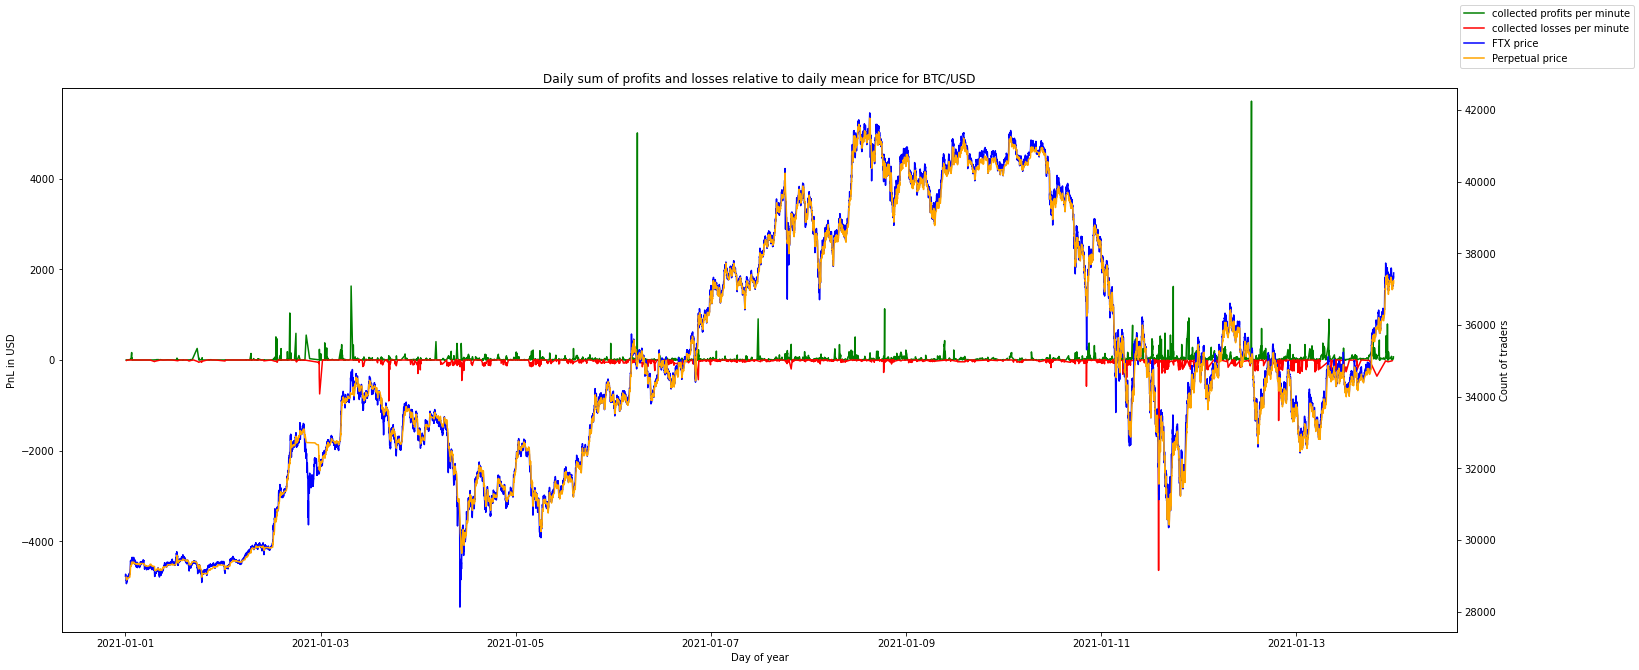

In [13]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                               (changes_opens_closes_2021_df["time"] >= datetime(2021, 1, 1)) &
                                                               (changes_opens_closes_2021_df["time"] <= datetime(2021, 1, 14))], 
                                  btc_ftx_price_df[(btc_ftx_price_df["datetime"] >= datetime(2021, 1, 1)) &
                                                   (btc_ftx_price_df["datetime"] <= datetime(2021, 1, 14))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] >= datetime(2021, 1, 1)) &
                                                                (minutewise_high_low_price_btc["time"] <= datetime(2021, 1, 14))], 
                                  "BTC")

## Plot of 2021 with minutewise mean price distribution for BTC, ETH, PERP

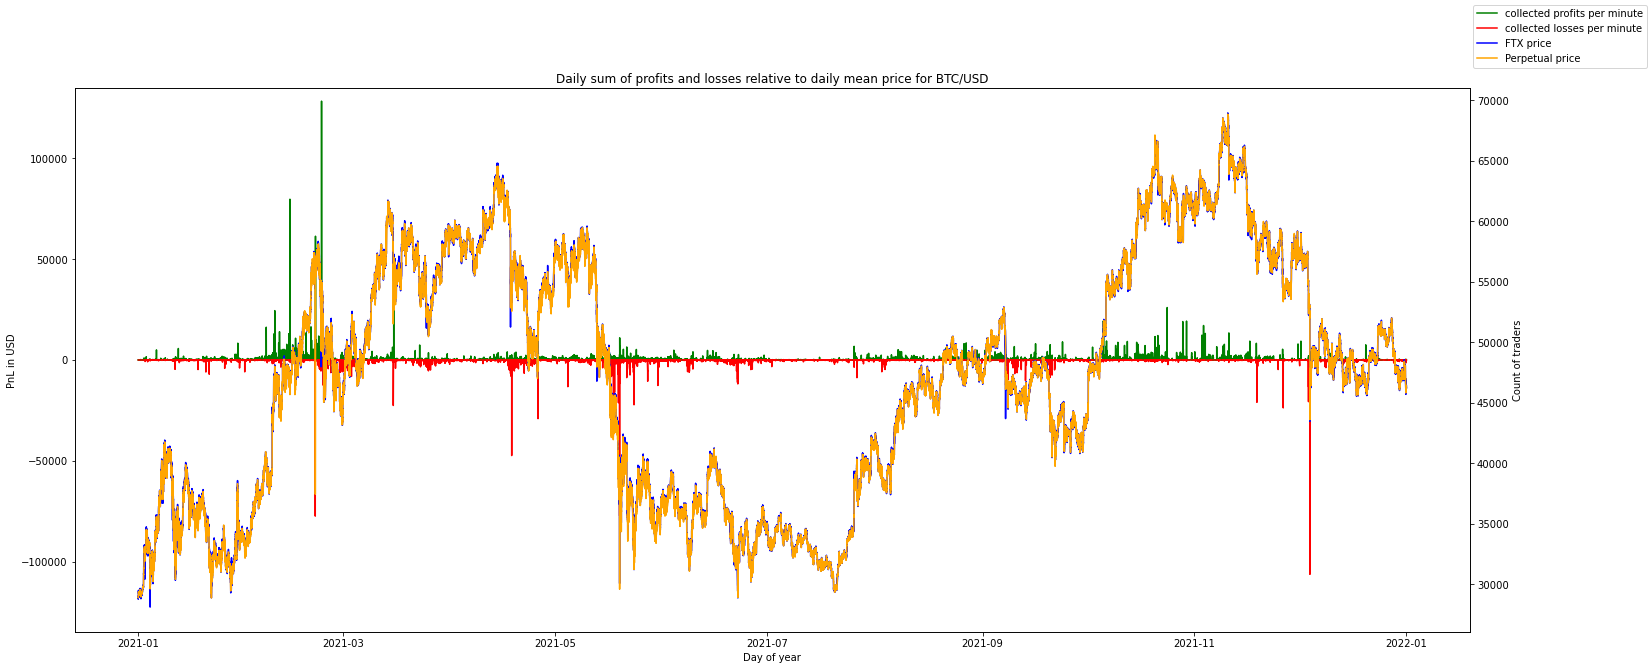

In [14]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  btc_ftx_price_df, minutewise_high_low_price_btc, "BTC")

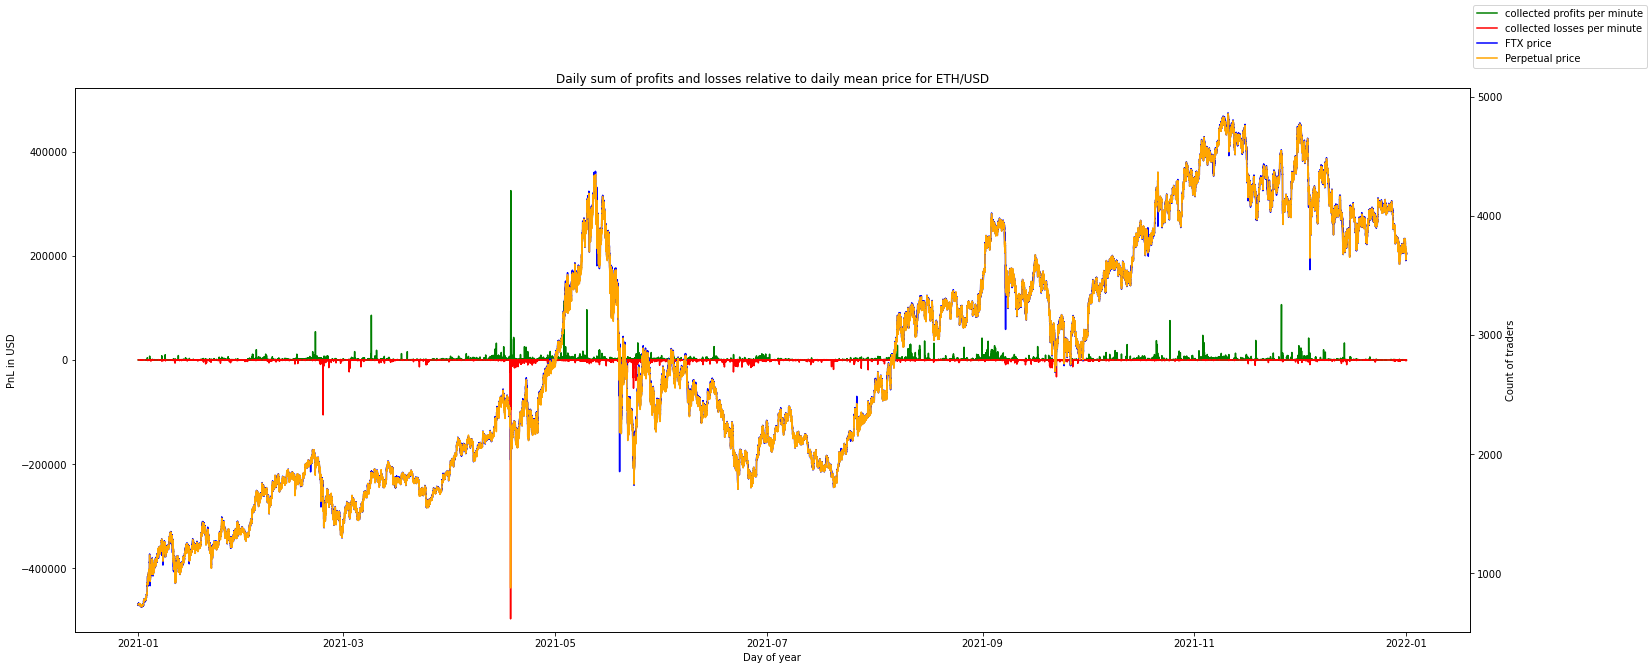

In [15]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  eth_ftx_price_df, minutewise_high_low_price_eth, "ETH")

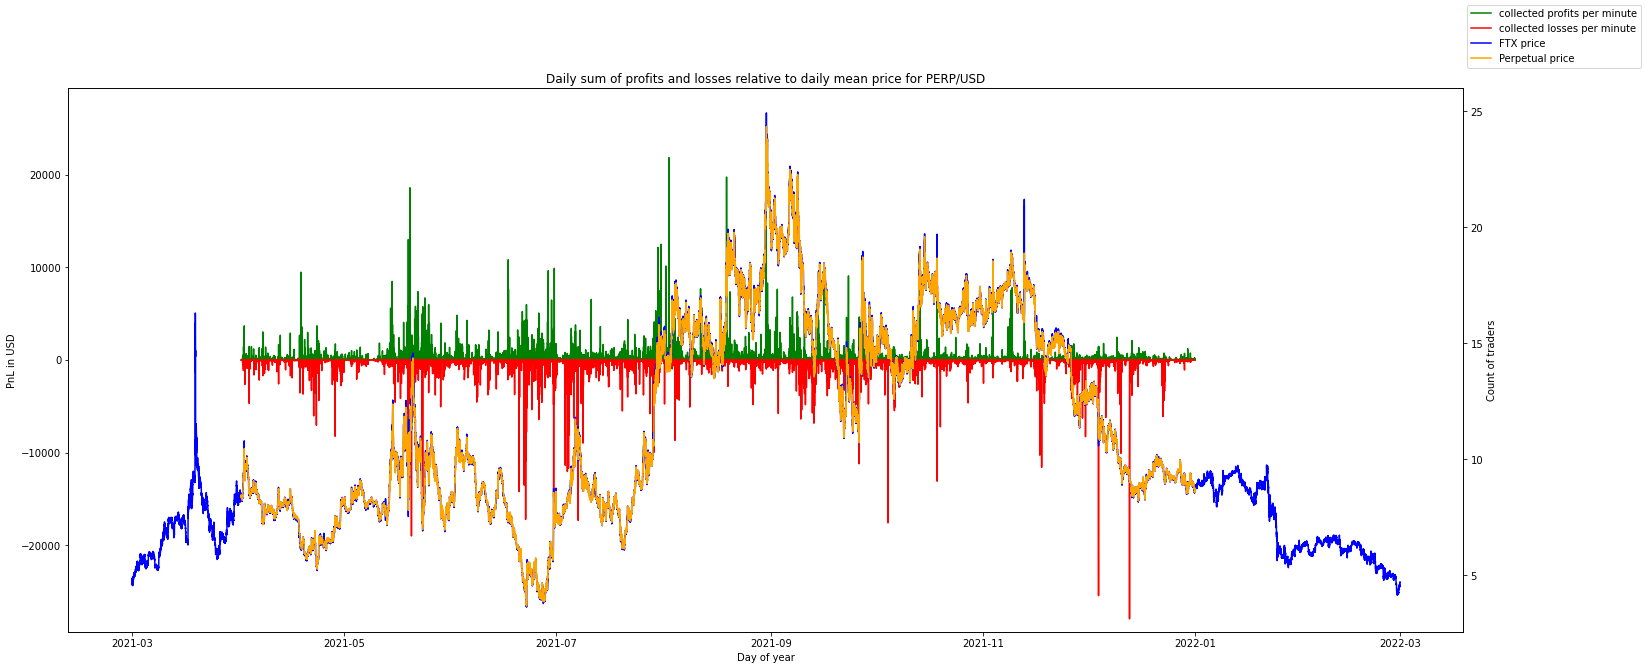

In [16]:
plot_minutewise_pnl_to_mean_price(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  perp_ftx_price_df, minutewise_high_low_price_perp, "PERP")

# Check theory about price difference

Datasets have problem in getting the same indexes and it is not possible to extract indexes through the MultiIndex without problems, so there will be used a ```join``` operation that will all the magic under the plotting function, but it is required to set columns ```day_of_year, hour, minute``` as index

In [17]:
indexed_btc_ftx_price_df = btc_ftx_price_df
indexed_btc_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

indexed_eth_ftx_price_df = eth_ftx_price_df
indexed_eth_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

indexed_perp_ftx_price_df = perp_ftx_price_df
indexed_perp_ftx_price_df.set_index(keys=["day_of_year", "hour", "minute"], inplace=True)

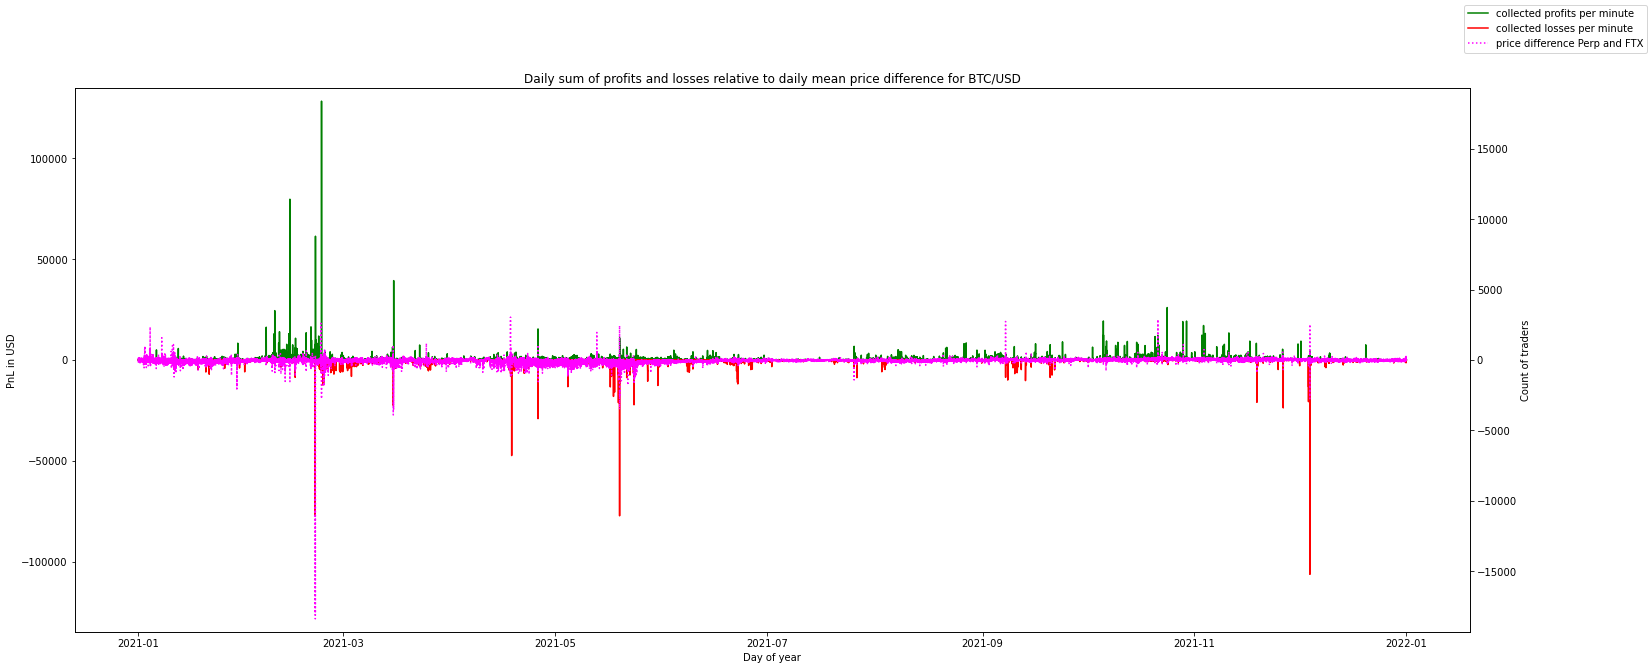

In [18]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  indexed_btc_ftx_price_df, minutewise_high_low_price_btc, "BTC", separate_plots=False)

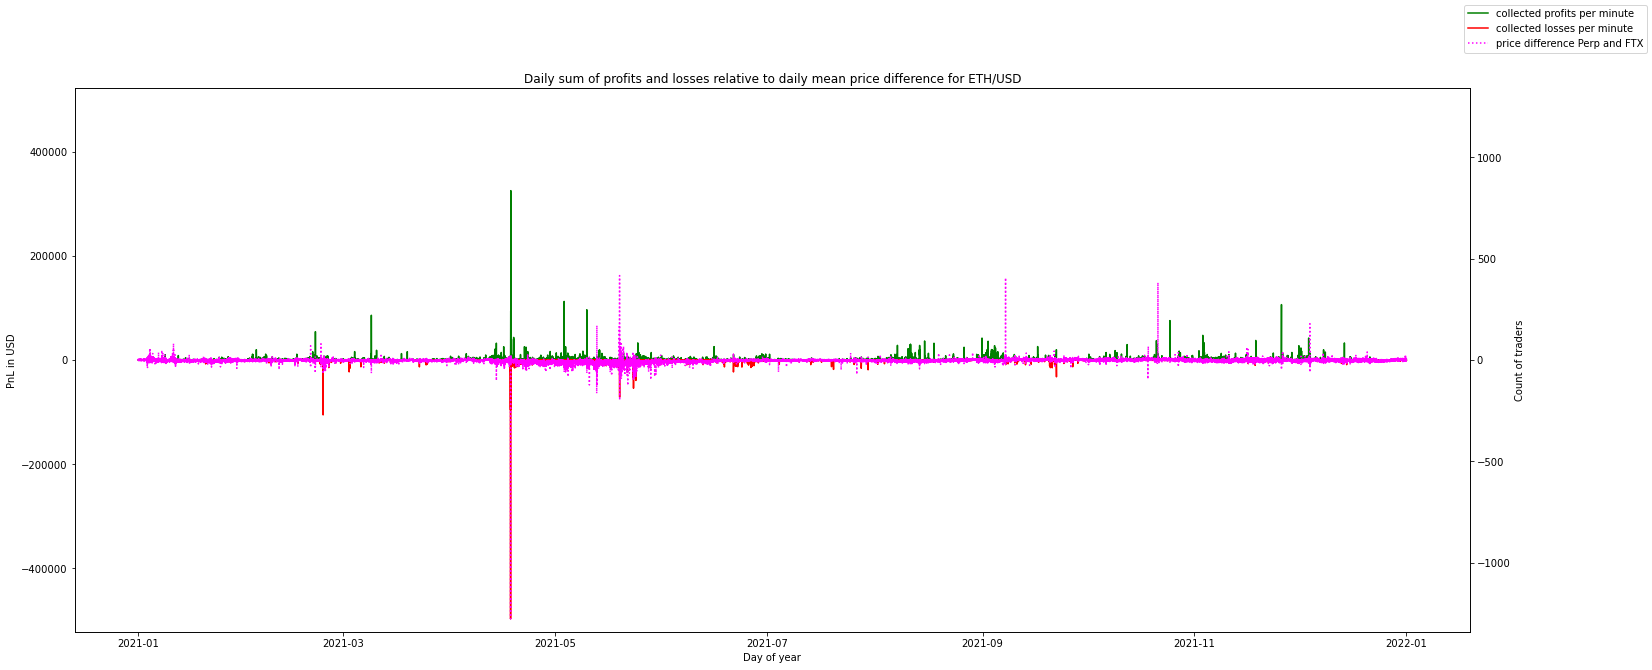

In [19]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  indexed_eth_ftx_price_df, minutewise_high_low_price_eth, "ETH", separate_plots=False)

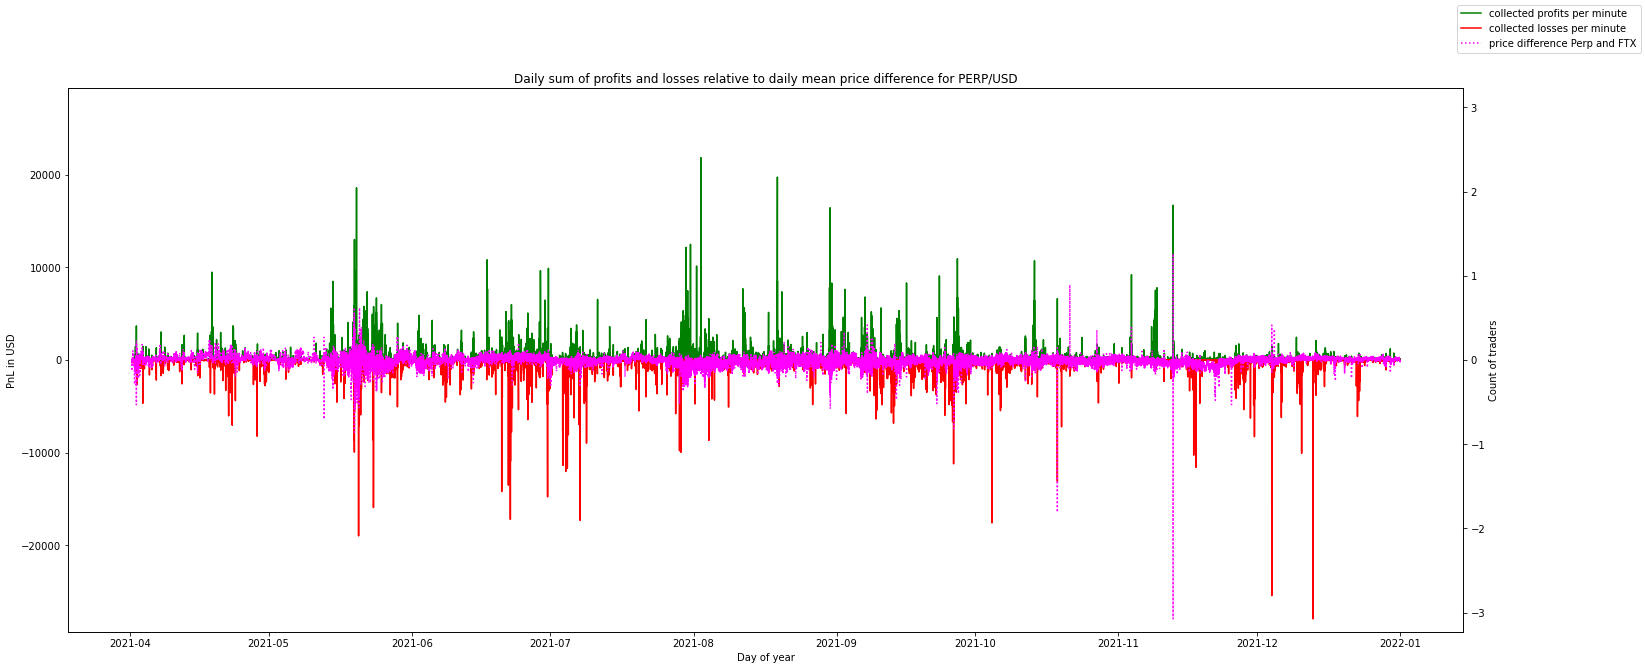

In [20]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  indexed_perp_ftx_price_df, minutewise_high_low_price_perp, "PERP", separate_plots=False)

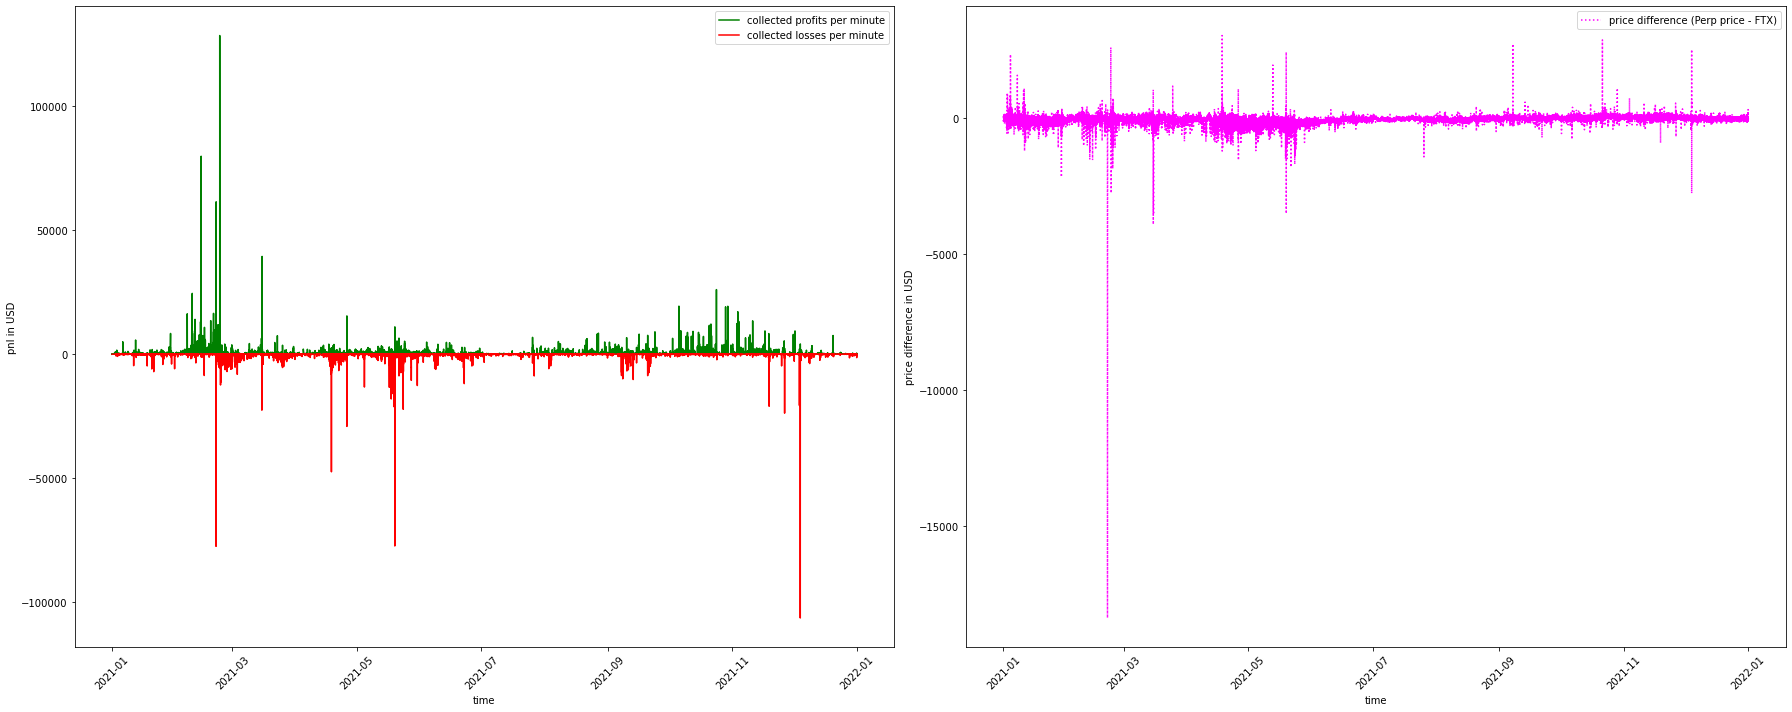

In [21]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC")], 
                                  indexed_btc_ftx_price_df, minutewise_high_low_price_btc, "BTC", separate_plots=True)

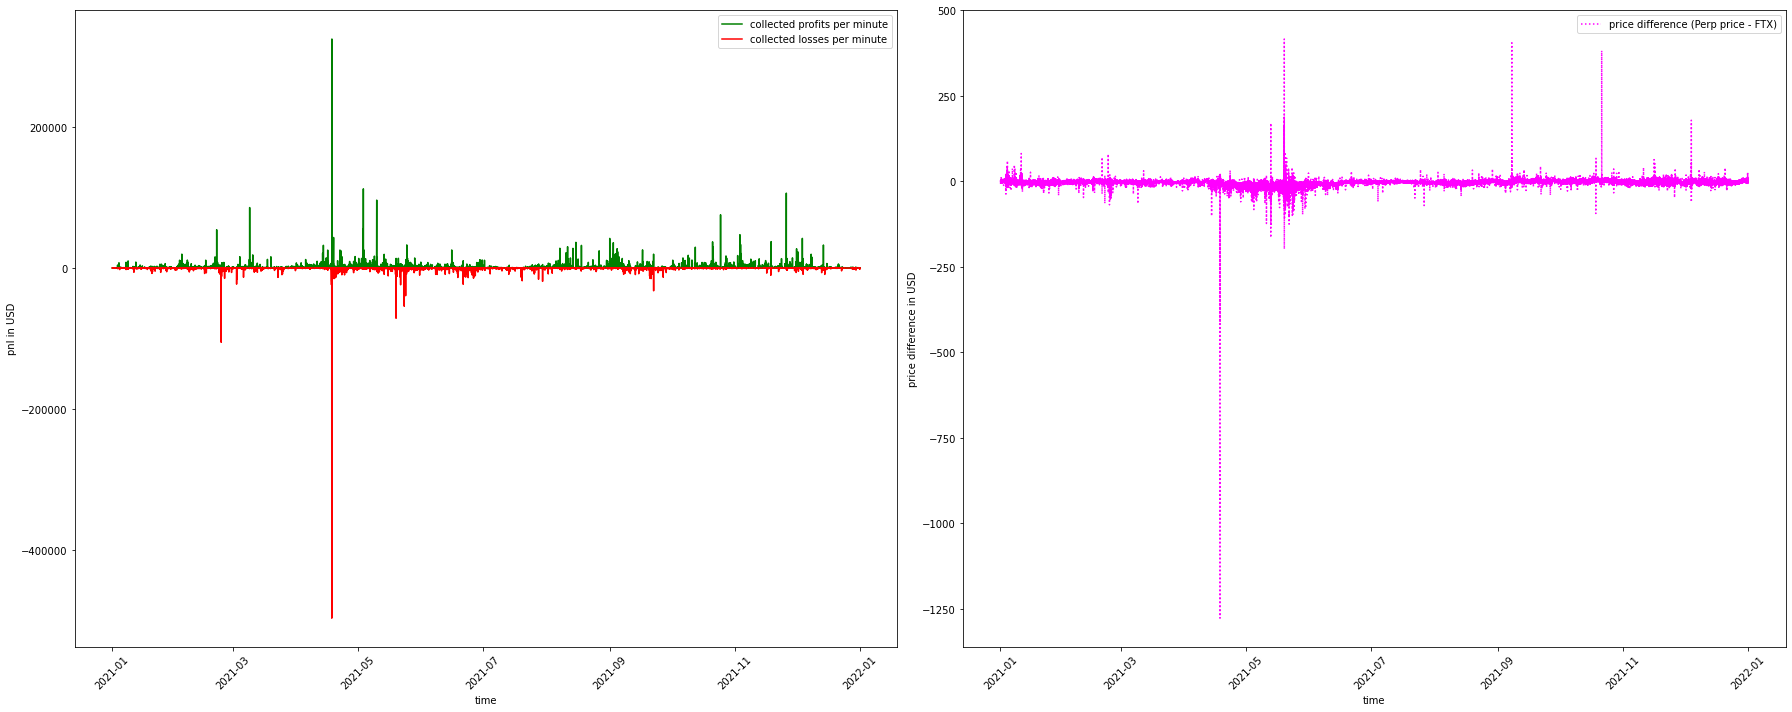

In [22]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC")], 
                                  indexed_eth_ftx_price_df, minutewise_high_low_price_eth, "ETH", separate_plots=True)

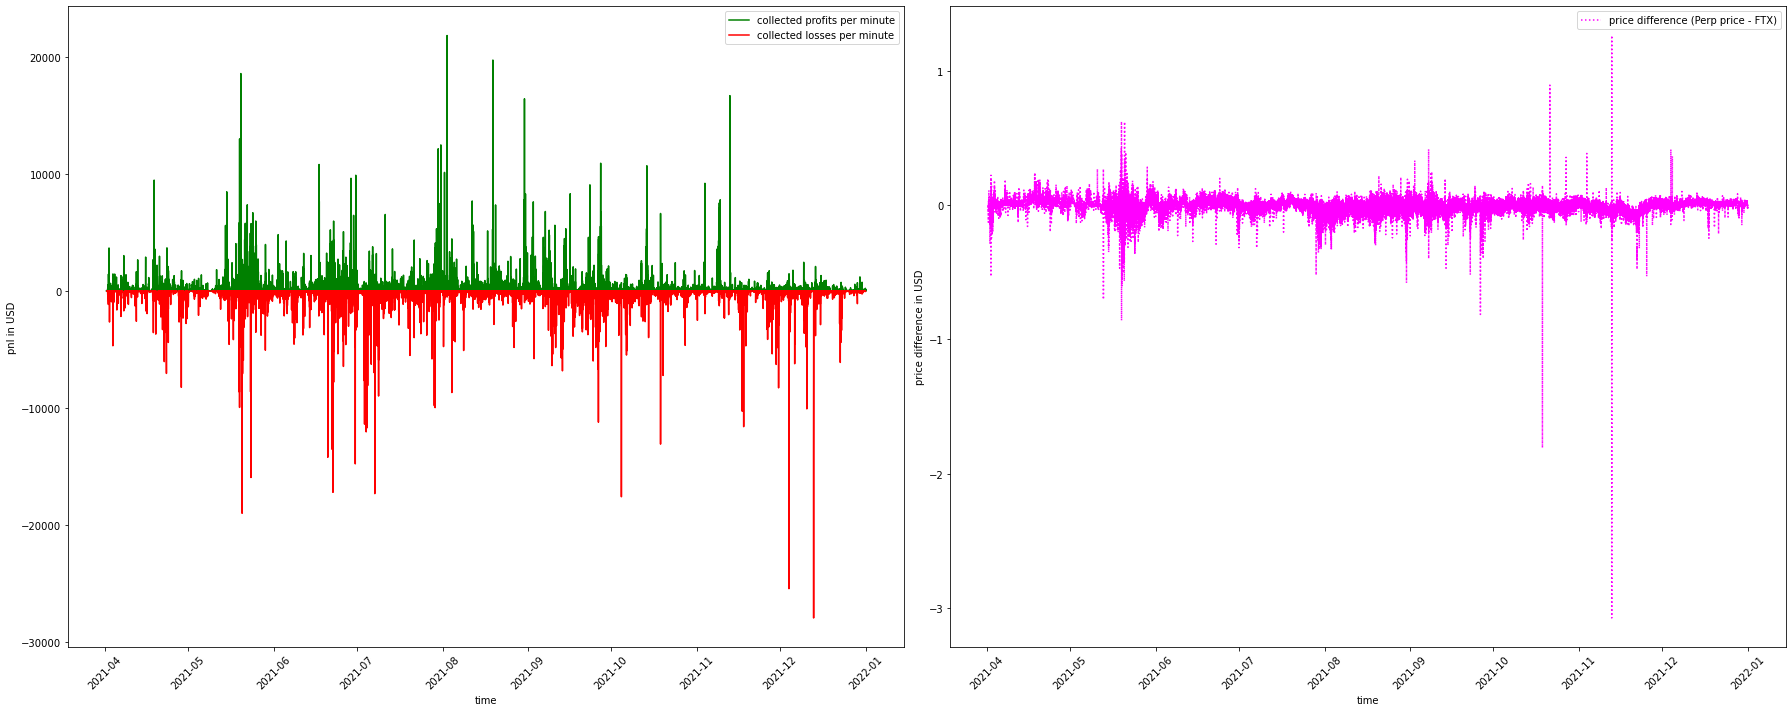

In [23]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC")], 
                                  indexed_perp_ftx_price_df, minutewise_high_low_price_perp, "PERP", separate_plots=True)

# Extracting moments with biggest price changes

In [27]:
btc_price_diff_df = btc_ftx_price_df.join(minutewise_high_low_price_btc.rename(columns={"high": "perp_high", "low": "perp_low"}))
btc_price_diff_df.dropna(inplace=True)
btc_price_diff_df["perp_mean"] = (btc_price_diff_df["perp_high"] + btc_price_diff_df["perp_low"]) / 2
btc_price_diff_df["ftx_mean"] = (btc_price_diff_df["high"] + btc_price_diff_df["low"]) / 2
btc_price_diff_df["mean_diff"] = btc_price_diff_df["perp_mean"] - btc_price_diff_df["ftx_mean"]
btc_price_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
1           0    9       28947.0  28963.5  28888.5  28906.5  9.353515e+05   
                 11      28902.5  28919.0  28827.0  28864.5  8.463872e+04   
                 12      28864.5  28896.5  28864.5  28888.5  2.455438e+04   
                 13      28888.5  28888.5  28779.5  28781.0  5.708684e+05   
                 14      28781.0  28820.5  28737.5  28812.5  5.385798e+05   
...                          ...      ...      ...      ...           ...   
365         23   33      46395.0  46510.0  46373.0  46470.0  7.510078e+05   
                 53      46352.0  46352.0  46304.0  46311.0  2.451981e+05   
                 54      46311.0  46311.0  46261.0  46280.0  1.941372e+05   
                 55      46280.0  46280.0  46242.0  46244.0  1.835072e+05   
                 58      46237.0  46237.0  46136.0  46179.0  1.191280e+06   

                                   datetime     perp_high      perp_low  \
day_of_year hour minute                                                   
1           0    9      2021-01-01 00:09:00  28959.727627  28957.442469   
                 11     2021-01-01 00:11:00  28953.872892  28945.736026   
                 12     2021-01-01 00:12:00  28942.311123  28940.456032   
                 13     2021-01-01 00:13:00  28937.031935  28925.480922   
                 14     2021-01-01 00:14:00  28923.057646  28884.477598   
...                                     ...           ...           ...   
365         23   33     2021-12-31 23:33:00  46404.354442  46404.354442   
                 53     2021-12-31 23:53:00  46388.749782  46388.749782   
                 54     2021-12-31 23:54:00  46351.456419  46351.441422   
                 55     2021-12-31 23:55:00  46289.160186  46289.160186   
                 58     2021-12-31 23:58:00  46264.306633  46212.412414   

                            timestamp                time     perp_mean  \
day_of_year hour minute                                                   
1           0    9       1.609460e+09 2021-01-01 00:09:50  28958.585048   
                 11      1.609460e+09 2021-01-01 00:11:30  28949.804459   
                 12      1.609460e+09 2021-01-01 00:12:00  28941.383578   
                 13      1.609460e+09 2021-01-01 00:13:10  28931.256428   
                 14      1.609460e+09 2021-01-01 00:14:00  28903.767622   
...                               ...                 ...           ...   
365         23   33      1.640994e+09 2021-12-31 23:33:50  46404.354442   
                 53      1.640995e+09 2021-12-31 23:53:20  46388.749782   
                 54      1.640995e+09 2021-12-31 23:54:35  46351.448921   
                 55      1.640995e+09 2021-12-31 23:55:45  46289.160186   
                 58      1.640995e+09 2021-12-31 23:58:15  46238.359523   

                         ftx_mean   mean_diff  
day_of_year hour minute                        
1           0    9        28926.0   32.585048  
                 11       28873.0   76.804459  
                 12       28880.5   60.883578  
                 13       28834.0   97.256428  
                 14       28779.0  124.767622  
...                           ...         ...  
365         23   33       46441.5  -37.145558  
                 53       46328.0   60.749782  
                 54       46286.0   65.448921  
                 55       46261.0   28.160186  
                 58       46186.5   51.859523  

[201434 rows x 13 columns]

In [49]:
btc_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = btc_price_diff_df.tail(20)
biggest_negative_diff_df = btc_price_diff_df.head(100)

In [35]:
biggest_positive_diff_df

,,,open,high,low,close,volume,datetime,perp_high,perp_low,timestamp,time,perp_mean,ftx_mean,mean_diff
day_of_year,hour,minute,,,,,,,,,,,,,
4,10,18,28300.5,29177.5,28223.0,28771.0,1.390056e+06,2021-01-04 10:18:00,30440.566209,30350.407025,1.609755e+09,2021-01-04 10:18:00,30395.486617,28700.25,1695.236617
108,3,22,54421.0,56015.0,54223.0,55408.0,3.290946e+06,2021-04-18 03:22:00,56929.778775,56827.071239,1.618716e+09,2021-04-18 03:22:25,56878.425007,55119.00,1759.425007
133,0,2,47412.0,47895.0,46611.0,46812.0,3.544551e+06,2021-05-13 00:02:00,49100.649668,48996.939022,1.620864e+09,2021-05-13 00:02:05,49048.794345,47253.00,1795.794345
250,15,11,44256.0,45000.0,44044.0,44914.0,2.608327e+06,2021-09-07 15:11:00,46380.113419,46255.732924,1.631027e+09,2021-09-07 15:11:15,46317.923171,44522.00,1795.923171
133,0,3,46807.0,47725.0,45853.0,46624.0,4.175564e+06,2021-05-13 00:03:00,48896.515392,48600.706311,1.620864e+09,2021-05-13 00:03:05,48748.610851,46789.00,1959.610851
53,14,16,49929.0,50007.0,47500.0,47872.0,1.277886e+07,2021-02-22 14:16:00,50833.278363,50601.700259,1.614003e+09,2021-02-22 14:16:20,50717.489311,48753.50,1963.989311
139,12,54,33440.0,33526.0,32000.0,32096.0,4.331625e+06,2021-05-19 12:54:00,34848.141701,34657.270175,1.621429e+09,2021-05-19 12:54:05,34752.705938,32763.00,1989.705938
4,10,16,29055.0,29102.5,27700.5,27971.5,1.646875e+06,2021-01-04 10:16:00,30596.962151,30516.912331,1.609755e+09,2021-01-04 10:16:00,30556.937241,28401.50,2155.437241
139,12,56,32143.0,32244.0,31961.0,32048.0,4.016334e+06,2021-05-19 12:56:00,34457.062073,34278.191269,1.621429e+09,2021-05-19 12:56:00,34367.626671,32102.50,2265.126671


In [50]:
biggest_negative_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
51          23   13      55820.0  55909.0  55780.0  55900.0  2.103337e+05   
                 14      55900.0  55917.0  55841.0  55899.0  2.137261e+05   
                 15      55899.0  55902.0  55752.0  55752.0  1.118241e+05   
                 16      55752.0  55788.0  55652.0  55745.0  4.029467e+04   
                 17      55745.0  55765.0  55670.0  55739.0  2.000566e+05   
...                          ...      ...      ...      ...           ...   
139         13   21      33312.0  33733.0  32100.0  32598.0  2.461351e+06   
338         5    32      46522.0  46949.0  46145.0  46805.0  5.373902e+06   
53          18   15      51849.0  52136.0  51849.0  52080.0  4.975427e+04   
74          12   44      56137.0  56192.0  56129.0  56164.0  1.852233e+06   
139         13   28      33828.0  33976.0  33300.0  33568.0  3.367603e+06   

                                   datetime     perp_high      perp_low  \
day_of_year hour minute                                                   
51          23   13     2021-02-20 23:13:00  37520.097729  37383.395763   
                 14     2021-02-20 23:14:00  37544.946961  37527.047080   
                 15     2021-02-20 23:15:00  37551.904227  37491.078568   
                 16     2021-02-20 23:16:00  37558.708552  37538.534976   
                 17     2021-02-20 23:17:00  37565.880522  37528.694657   
...                                     ...           ...           ...   
139         13   21     2021-05-19 13:21:00  30230.512189  30073.755705   
338         5    32     2021-12-04 05:32:00  44110.549696  43460.422475   
53          18   15     2021-02-22 18:15:00  49289.871428  49189.582219   
74          12   44     2021-03-15 12:44:00  53798.303837  53193.039328   
139         13   28     2021-05-19 13:28:00  31051.061528  30922.212760   

                            timestamp                time     perp_mean  \
day_of_year hour minute                                                   
51          23   13      1.613863e+09 2021-02-20 23:13:05  37451.746746   
                 14      1.613863e+09 2021-02-20 23:14:05  37535.997020   
                 15      1.613863e+09 2021-02-20 23:15:00  37521.491398   
                 16      1.613863e+09 2021-02-20 23:16:10  37548.621764   
                 17      1.613863e+09 2021-02-20 23:17:35  37547.287590   
...                               ...                 ...           ...   
139         13   21      1.621430e+09 2021-05-19 13:21:05  30152.133947   
338         5    32      1.638596e+09 2021-12-04 05:32:00  43785.486085   
53          18   15      1.614018e+09 2021-02-22 18:15:15  49239.726823   
74          12   44      1.615812e+09 2021-03-15 12:44:05  53495.671582   
139         13   28      1.621431e+09 2021-05-19 13:28:00  30986.637144   

                         ftx_mean     mean_diff  
day_of_year hour minute                          
51          23   13       55844.5 -18392.753254  
                 14       55879.0 -18343.002980  
                 15       55827.0 -18305.508602  
                 16       55720.0 -18171.378236  
                 17       55717.5 -18170.212410  
...                           ...           ...  
139         13   21       32916.5  -2764.366053  
338         5    32       46547.0  -2761.513915  
53          18   15       51992.5  -2752.773177  
74          12   44       56160.5  -2664.828418  
139         13   28       33638.0  -2651.362856  

[100 rows x 13 columns]

Days with biggest differences in the BTC prices:
*   **108 - biggest positive difference (April 18);**
*   **51 - biggets negative difference (20 February);**
*   294 - positive (21 October);
*   53 - positive (22 February);
*   338 - positive (4 December);
*   139 - positive (19 May);
*   4 - positive (January 4);
*   133 - positive (13 May);
*   250 - positive (7 September);
*   74 - negative (15 March);
*   52 - negative (21 February);

In [66]:
eth_price_diff_df = eth_ftx_price_df.join(minutewise_high_low_price_eth.rename(columns={"high": "perp_high", "low": "perp_low"}))
eth_price_diff_df.dropna(inplace=True)
eth_price_diff_df["perp_mean"] = (eth_price_diff_df["perp_high"] + eth_price_diff_df["perp_low"]) / 2
eth_price_diff_df["ftx_mean"] = (eth_price_diff_df["high"] + eth_price_diff_df["low"]) / 2
eth_price_diff_df["mean_diff"] = eth_price_diff_df["perp_mean"] - eth_price_diff_df["ftx_mean"]
eth_price_diff_df

open     high      low    close        volume  \
day_of_year hour minute                                                     
1           0    1        737.80   739.92   737.80   739.53   30086.73403   
                 8        736.00   736.00   734.63   735.17  131081.19620   
                 9        735.17   735.76   733.79   733.93    9391.59751   
                 10       733.93   734.92   733.71   733.71   93304.41975   
                 11       733.71   734.12   731.56   733.04    7461.30084   
...                          ...      ...      ...      ...           ...   
365         23   48      3690.10  3690.40  3686.80  3686.80   27180.35720   
                 50      3687.00  3687.00  3683.80  3684.20   57810.83160   
                 53      3685.20  3685.30  3680.30  3680.80  125901.02420   
                 58      3677.70  3678.60  3672.60  3675.50  293073.79940   
                 59      3675.50  3678.60  3675.20  3676.50  138598.98440   

                                   datetime    perp_high     perp_low  \
day_of_year hour minute                                                 
1           0    1      2021-01-01 00:01:00   737.882327   737.709061   
                 8      2021-01-01 00:08:00   737.794798   737.337011   
                 9      2021-01-01 00:09:00   737.247842   737.055969   
                 10     2021-01-01 00:10:00   736.969164   736.738792   
                 11     2021-01-01 00:11:00   736.692233   736.375695   
...                                     ...          ...          ...   
365         23   48     2021-12-31 23:48:00  3695.051917  3695.051917   
                 50     2021-12-31 23:50:00  3691.906331  3691.906331   
                 53     2021-12-31 23:53:00  3694.690922  3684.711282   
                 58     2021-12-31 23:58:00  3681.570278  3679.683100   
                 59     2021-12-31 23:59:00  3682.084257  3682.084257   

                            timestamp                time    perp_mean  \
day_of_year hour minute                                                  
1           0    1       1.609459e+09 2021-01-01 00:01:10   737.795694   
                 8       1.609460e+09 2021-01-01 00:08:05   737.565905   
                 9       1.609460e+09 2021-01-01 00:09:25   737.151906   
                 10      1.609460e+09 2021-01-01 00:10:00   736.853978   
                 11      1.609460e+09 2021-01-01 00:11:10   736.533964   
...                               ...                 ...          ...   
365         23   48      1.640995e+09 2021-12-31 23:48:25  3695.051917   
                 50      1.640995e+09 2021-12-31 23:50:05  3691.906331   
                 53      1.640995e+09 2021-12-31 23:53:10  3689.701102   
                 58      1.640995e+09 2021-12-31 23:58:15  3680.626689   
                 59      1.640995e+09 2021-12-31 23:59:45  3682.084257   

                         ftx_mean  mean_diff  
day_of_year hour minute                       
1           0    1        738.860  -1.064306  
                 8        735.315   2.250905  
                 9        734.775   2.376906  
                 10       734.315   2.538978  
                 11       732.840   3.693964  
...                           ...        ...  
365         23   48      3688.600   6.451917  
                 50      3685.400   6.506331  
                 53      3682.800   6.901102  
                 58      3675.600   5.026689  
                 59      3676.900   5.184257  

[275742 rows x 13 columns]

In [67]:
eth_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = eth_price_diff_df.tail(20)
biggest_negative_diff_df = eth_price_diff_df.head(20)

In [68]:
biggest_positive_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
139         13   3       2186.0  2219.9  2124.4  2172.4  1.180923e+06   
            12   50      2345.2  2352.9  2211.1  2246.5  2.328916e+06   
250         15   7       3440.5  3441.1  3145.5  3254.8  5.539080e+06   
                 11      3170.0  3274.5  3156.4  3246.4  2.579805e+06   
139         12   59      2245.8  2381.9  1987.5  2316.4  6.134608e+06   
            13   12      1900.0  2075.3  1899.9  2059.9  1.734996e+06   
            12   58      2191.5  2359.5  2004.1  2272.4  5.897074e+06   
            13   8       2066.5  2080.7  1920.1  1930.4  2.308786e+06   
            12   57      2043.6  2229.7  2030.0  2227.1  2.424699e+06   
250         15   8       3254.8  3312.8  3040.0  3097.0  6.347705e+06   
                 10      3039.1  3227.4  3026.3  3167.4  6.104679e+06   
139         13   11      1835.1  1956.3  1835.0  1900.0  1.239655e+06   
            12   53      2176.9  2212.2  2011.0  2014.2  2.375391e+06   
                 56      2014.6  2130.8  2004.1  2043.6  8.096658e+06   
            13   10      1874.2  1885.6  1821.8  1835.1  1.712079e+06   
                 9       1930.4  1939.8  1821.8  1872.0  2.821353e+06   
294         11   34      4344.0  4350.0  3477.0  4229.1  1.548388e+07   
250         15   9       3100.2  3100.3  2994.1  3037.7  5.601592e+06   
139         12   54      2014.2  2054.8  1975.2  1990.0  5.035937e+06   
                 55      1990.0  2014.6  1980.0  2014.6  3.287100e+06   

                                   datetime    perp_high     perp_low  \
day_of_year hour minute                                                 
139         13   3      2021-05-19 13:03:00  2356.920134  2352.601906   
            12   50     2021-05-19 12:50:00  2472.487606  2468.099394   
250         15   7      2021-09-07 15:07:00  3487.579505  3485.646041   
                 11     2021-09-07 15:11:00  3419.896191  3411.473360   
139         12   59     2021-05-19 12:59:00  2391.359458  2383.970102   
            13   12     2021-05-19 13:12:00  2195.481578  2186.904083   
            12   58     2021-05-19 12:58:00  2389.620283  2387.251281   
            13   8      2021-05-19 13:08:00  2274.583898  2267.170363   
            12   57     2021-05-19 12:57:00  2405.261452  2399.149199   
250         15   8      2021-09-07 15:08:00  3481.182439  3464.167853   
                 10     2021-09-07 15:10:00  3430.717312  3420.227351   
139         13   11     2021-05-19 13:11:00  2207.351655  2197.843246   
            12   53     2021-05-19 12:53:00  2440.429684  2434.494685   
                 56     2021-05-19 12:56:00  2408.241666  2405.262620   
            13   10     2021-05-19 13:10:00  2235.011176  2207.392255   
                 9      2021-05-19 13:09:00  2266.818304  2235.269675   
294         11   34     2021-10-21 11:34:00  4346.202884  4245.436100   
250         15   9      2021-09-07 15:09:00  3455.751484  3449.616403   
139         12   54     2021-05-19 12:54:00  2434.494667  2421.121421   
                 55     2021-05-19 12:55:00  2414.411157  2413.306696   

                            timestamp                time    perp_mean  \
day_of_year hour minute                                                  
139         13   3       1.621429e+09 2021-05-19 13:03:05  2354.761020   
            12   50      1.621429e+09 2021-05-19 12:50:00  2470.293500   
250         15   7       1.631027e+09 2021-09-07 15:07:05  3486.612773   
                 11      1.631027e+09 2021-09-07 15:11:00  3415.684776   
139         12   59      1.621429e+09 2021-05-19 12:59:00  2387.664780   
            13   12      1.621430e+09 2021-05-19 13:12:00  2191.192830   
            12   58      1.621429e+09 2021-05-19 12:58:00  2388.435782   
            13   8       1.621430e+09 2021-05-19 13:08:00  2270.877131   
            12   57      1.621429e+09 2021-05-19 12:57:00  2402.205325   

In [69]:
biggest_negative_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
108         4    6       2149.8  2170.3  2148.2  2168.3  1.851841e+06   
                 9       2158.6  2177.8  2154.6  2170.4  3.740247e+06   
                 7       2168.3  2172.2  2147.8  2154.4  1.373304e+06   
                 4       2147.8  2154.9  2143.9  2145.2  2.848670e+06   
                 5       2145.3  2154.2  2143.2  2149.7  3.276876e+06   
                 10      2170.8  2178.6  2156.3  2163.5  1.904530e+06   
                 8       2154.4  2159.0  2142.9  2158.6  1.903784e+06   
            3    59      2176.8  2189.2  2173.0  2173.0  1.103546e+06   
            4    3       2150.8  2161.0  2146.4  2149.6  4.789693e+06   
                 11      2163.5  2164.4  2150.3  2156.2  1.564093e+06   
            3    58      2159.7  2182.2  2150.4  2176.8  1.373046e+06   
            4    0       2175.4  2176.7  2151.1  2171.5  1.011782e+06   
                 12      2156.1  2162.8  2150.1  2161.6  2.659065e+06   
                 13      2161.5  2169.9  2157.4  2162.1  1.854689e+06   
                 1       2169.8  2177.6  2137.5  2150.7  1.396631e+06   
                 14      2162.2  2168.1  2160.7  2164.1  2.088587e+06   
                 2       2151.9  2156.6  2129.7  2150.8  3.794714e+06   
                 15      2164.2  2169.2  2161.6  2166.3  1.520026e+06   
                 16      2166.3  2169.0  2161.0  2165.0  8.306355e+05   
            3    57      2143.4  2161.7  2142.6  2158.2  2.536597e+06   

                                   datetime    perp_high    perp_low  \
day_of_year hour minute                                                
108         4    6      2021-04-18 04:06:00   881.932210  881.625210   
                 9      2021-04-18 04:09:00   891.440737  890.290017   
                 7      2021-04-18 04:07:00   888.516484  882.126902   
                 4      2021-04-18 04:04:00   878.455758  878.169145   
                 5      2021-04-18 04:05:00   881.119567  881.119567   
                 10     2021-04-18 04:10:00   910.483669  891.131071   
                 8      2021-04-18 04:08:00   888.360541  883.388600   
            3    59     2021-04-18 03:59:00   930.225292  930.225292   
            4    3      2021-04-18 04:03:00   939.094378  877.953309   
                 11     2021-04-18 04:11:00   921.844611  910.167622   
            3    58     2021-04-18 03:58:00   929.531716  927.407681   
            4    0      2021-04-18 04:00:00   931.373400  929.909763   
                 12     2021-04-18 04:12:00   925.466589  921.160385   
                 13     2021-04-18 04:13:00   944.909736  926.232639   
                 1      2021-04-18 04:01:00   931.688942  931.688942   
                 14     2021-04-18 04:14:00   957.834638  945.494779   
                 2      2021-04-18 04:02:00   938.777585  931.373400   
                 15     2021-04-18 04:15:00   976.666163  958.971002   
                 16     2021-04-18 04:16:00   990.713147  977.650126   
            3    57     2021-04-18 03:57:00  1032.826874  947.721091   

                            timestamp                time   perp_mean  \
day_of_year hour minute                                                 
108         4    6       1.618719e+09 2021-04-18 04:06:00  881.778710   
                 9       1.618719e+09 2021-04-18 04:09:05  890.865377   
                 7       1.618719e+09 2021-04-18 04:07:30  885.321693   
                 4       1.618719e+09 2021-04-18 04:04:10  878.312452   
                 5       1.618719e+09 2021-04-18 04:05:20  881.119567   
                 10      1.618719e+09 2021-04-18 04:10:00  900.807370   
                 8       1.618719e+09 2021-04-18 04:08:15  885.874570   
            3    59      1.618718e+09 2021-04-18 03:59:10  930.225292   
            4    3       1.618719e+09 2021-04-18 04:03:15  908.523844   
                 11      1.61871

Days with biggest difference in ETH price:

*   **139 - biggest positive (May 19);**
*   **108 - biggest negative (April 18);**
*   250 - positive (September 7);
*   294 - positive (October 21);

In [74]:
perp_price_diff_df = perp_ftx_price_df.join(minutewise_high_low_price_perp.rename(columns={"high": "perp_high", "low": "perp_low"}))
perp_price_diff_df.dropna(inplace=True)
perp_price_diff_df["perp_mean"] = (perp_price_diff_df["perp_high"] + perp_price_diff_df["perp_low"]) / 2
perp_price_diff_df["ftx_mean"] = (perp_price_diff_df["high"] + perp_price_diff_df["low"]) / 2
perp_price_diff_df["mean_diff"] = perp_price_diff_df["perp_mean"] - perp_price_diff_df["ftx_mean"]
perp_price_diff_df

open   high    low  close      volume  \
day_of_year hour minute                                           
91          8    56      8.368  8.368  8.368  8.368      0.0000   
                 57      8.368  8.368  8.368  8.368      0.0000   
            9    5       8.372  8.575  8.371  8.531  40499.5383   
                 30      8.544  8.544  8.539  8.540   1151.4452   
                 31      8.540  8.540  8.528  8.531   5392.8122   
...                        ...    ...    ...    ...         ...   
365         23   52      8.770  8.779  8.770  8.779     14.9158   
                 55      8.779  8.779  8.735  8.735     96.0850   
                 57      8.735  8.735  8.735  8.735      0.0000   
                 58      8.735  8.735  8.729  8.729     14.8410   
                 59      8.729  8.773  8.701  8.773   3009.4790   

                                   datetime  perp_high  perp_low  \
day_of_year hour minute                                            
91          8    56     2021-04-01 08:56:00   8.368508  8.368508   
                 57     2021-04-01 08:57:00   8.368733  8.368661   
            9    5      2021-04-01 09:05:00   8.371643  8.371643   
                 30     2021-04-01 09:30:00   8.434587  8.392572   
                 31     2021-04-01 09:31:00   8.444542  8.444542   
...                                     ...        ...       ...   
365         23   52     2021-12-31 23:52:00   8.768260  8.768260   
                 55     2021-12-31 23:55:00   8.766963  8.745656   
                 57     2021-12-31 23:57:00   8.738147  8.738147   
                 58     2021-12-31 23:58:00   8.730660  8.730660   
                 59     2021-12-31 23:59:00   8.717547  8.704237   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
91          8    56      1.617267e+09 2021-04-01 08:56:35   8.368508   
                 57      1.617267e+09 2021-04-01 08:57:10   8.368697   
            9    5       1.617268e+09 2021-04-01 09:05:50   8.371643   
                 30      1.617269e+09 2021-04-01 09:30:35   8.413579   
                 31      1.617269e+09 2021-04-01 09:31:00   8.444542   
...                               ...                 ...        ...   
365         23   52      1.640995e+09 2021-12-31 23:52:30   8.768260   
                 55      1.640995e+09 2021-12-31 23:55:15   8.756309   
                 57      1.640995e+09 2021-12-31 23:57:40   8.738147   
                 58      1.640995e+09 2021-12-31 23:58:25   8.730660   
                 59      1.640995e+09 2021-12-31 23:59:10   8.710892   

                         ftx_mean  mean_diff  
day_of_year hour minute                       
91          8    56        8.3680   0.000508  
                 57        8.3680   0.000697  
            9    5         8.4730  -0.101357  
                 30        8.5415  -0.127921  
                 31        8.5340  -0.089458  
...                           ...        ...  
365         23   52        8.7745  -0.006240  
                 55        8.7570  -0.000691  
                 57        8.7350   0.003147  
                 58        8.7320  -0.001340  
                 59        8.7370  -0.026108  

[147960 rows x 13 columns]

In [75]:
perp_price_diff_df.sort_values(by="mean_diff", inplace=True)
biggest_positive_diff_df = perp_price_diff_df.tail(20)
biggest_negative_diff_df = perp_price_diff_df.head(20)

In [76]:
biggest_positive_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
338         5    32      10.598  10.650  10.550  10.616  8.263301e+03   
                 31      10.550  10.655  10.550  10.550  1.002959e+04   
250         15   3       19.482  19.723  19.371  19.487  1.984062e+03   
139         13   14       7.808   7.810   7.808   7.808  1.197801e+03   
                 21       7.665   7.722   7.665   7.722  4.093432e+03   
            11   24       8.836   8.836   8.800   8.800  2.971805e+04   
            12   59       8.103   8.139   8.042   8.138  1.045145e+04   
140         16   4       12.935  12.973  12.781  12.783  3.119907e+02   
139         12   55       8.289   8.377   8.194   8.194  2.690955e+04   
                 53       8.439   8.439   8.272   8.275  2.855035e+04   
140         16   7       12.733  12.905  12.501  12.635  1.079346e+04   
                 3       13.127  13.127  12.860  12.935  4.711678e+03   
139         13   20       7.660   7.665   7.660   7.665  8.231742e+02   
            12   58       8.095   8.129   8.000   8.103  7.253311e+04   
                 57       8.103   8.116   8.052   8.095  1.469057e+04   
140         16   9       12.501  12.644  12.501  12.523  0.000000e+00   
                 8       12.635  12.635  12.501  12.501  0.000000e+00   
139         12   56       8.194   8.194   8.093   8.103  2.940051e+04   
294         11   34      16.710  16.714  14.600  16.160  3.555337e+05   
316         20   36      16.944  17.564  14.860  16.305  1.088019e+06   

                                   datetime  perp_high   perp_low  \
day_of_year hour minute                                             
338         5    32     2021-12-04 05:32:00  11.006567  11.006567   
                 31     2021-12-04 05:31:00  11.017579  11.017579   
250         15   3      2021-09-07 15:03:00  20.021391  19.904879   
139         13   14     2021-05-19 13:14:00   8.228935   8.228935   
                 21     2021-05-19 13:21:00   8.114719   8.114719   
            11   24     2021-05-19 11:24:00   9.282630   9.199396   
            12   59     2021-05-19 12:59:00   8.516195   8.516195   
140         16   4      2021-05-20 16:04:00  13.493927  13.256307   
139         12   55     2021-05-19 12:55:00   8.795214   8.795214   
                 53     2021-05-19 12:53:00   8.911366   8.821237   
140         16   7      2021-05-20 16:07:00  13.228018  13.220122   
                 3      2021-05-20 16:03:00  13.545315  13.506152   
139         13   20     2021-05-19 13:20:00   8.202484   8.202484   
            12   58     2021-05-19 12:58:00   8.610937   8.610937   
                 57     2021-05-19 12:57:00   8.641941   8.623491   
140         16   9      2021-05-20 16:09:00  13.155180  13.150369   
                 8      2021-05-20 16:08:00  13.199062  13.177026   
139         12   56     2021-05-19 12:56:00   8.794993   8.737596   
294         11   34     2021-10-21 11:34:00  16.637737  16.463489   
316         20   36     2021-11-12 20:36:00  17.885860  17.063492   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
338         5    32      1.638596e+09 2021-12-04 05:32:25  11.006567   
                 31      1.638596e+09 2021-12-04 05:31:20  11.017579   
250         15   3       1.631027e+09 2021-09-07 15:03:10  19.963135   
139         13   14      1.621430e+09 2021-05-19 13:14:05   8.228935   
                 21      1.621430e+09 2021-05-19 13:21:10   8.114719   
            11   24      1.621423e+09 2021-05-19 11:24:00   9.241013   
            12   59      1.621429e+09 2021-05-19 12:59:20   8.516195   
140         16   4       1.621527e+09 2021-05-20 16:04:00  13.375117   
139         12   55      1.621429e+09 2021-05-19 12:55:15   8.795214   
                 53      1.621429e+09 2021-05-19 12:53:30   8.866302   
140         16   7       1.621527e+09

In [77]:
biggest_negative_diff_df

open    high     low   close        volume  \
day_of_year hour minute                                                 
316         20   31      17.601  24.030  17.407  21.098  3.269795e+06   
                 32      21.098  23.147  19.261  19.645  8.895363e+04   
291         18   52      19.812  19.990  19.418  19.541  1.720302e+05   
                 51      16.849  19.954  16.835  19.823  1.515766e+06   
139         13   44       9.135   9.197   9.135   9.135  0.000000e+00   
269         8    35      11.923  13.412  11.912  13.107  2.002671e+05   
316         20   33      19.642  20.233  19.099  19.642  1.469948e+05   
139         13   43       8.683   9.141   8.683   9.135  1.222231e+02   
133         0    23       7.552   9.062   7.552   7.655  2.802288e+05   
269         8    36      12.956  12.956  12.373  12.457  6.422017e+04   
139         16   47      10.830  10.940  10.654  10.892  1.923154e+03   
                 48      10.892  10.939  10.892  10.928  2.647646e+03   
242         14   55      24.973  25.230  24.626  24.746  7.105336e+04   
139         16   46      10.580  10.830  10.580  10.830  2.942407e+03   
291         18   53      19.541  19.604  18.677  19.040  1.300553e+05   
140         13   22      12.900  13.179  12.900  13.131  5.798645e+04   
139         13   45       9.135   9.135   8.753   8.759  3.271351e+03   
            16   55      11.700  11.780  11.632  11.773  4.723995e+03   
            13   47       8.962   9.087   8.885   9.019  4.944932e+03   
                 42       8.505   8.683   8.505   8.683  6.327528e+03   

                                   datetime  perp_high   perp_low  \
day_of_year hour minute                                             
316         20   31     2021-11-12 20:31:00  18.296842  16.991880   
                 32     2021-11-12 20:32:00  18.718756  18.307593   
291         18   52     2021-10-18 18:52:00  18.296028  17.496869   
                 51     2021-10-18 18:51:00  17.486357  16.833807   
139         13   44     2021-05-19 13:44:00   8.361041   8.252913   
269         8    35     2021-09-26 08:35:00  12.021450  11.674473   
316         20   33     2021-11-12 20:33:00  19.040233  18.736458   
139         13   43     2021-05-19 13:43:00   8.243980   8.096397   
133         0    23     2021-05-13 00:23:00   7.615453   7.593177   
269         8    36     2021-09-26 08:36:00  12.138935  11.921656   
139         16   47     2021-05-19 16:47:00  10.234286  10.150524   
                 48     2021-05-19 16:48:00  10.378192  10.268563   
242         14   55     2021-08-30 14:55:00  24.473116  24.224320   
139         16   46     2021-05-19 16:46:00  10.129401  10.129401   
291         18   53     2021-10-18 18:53:00  18.827369  18.317429   
140         13   22     2021-05-20 13:22:00  12.559211  12.387369   
139         13   45     2021-05-19 13:45:00   8.404485   8.370948   
            16   55     2021-05-19 16:55:00  11.179322  11.129088   
            13   47     2021-05-19 13:47:00   8.470614   8.417435   
                 42     2021-05-19 13:42:00   8.064141   8.055512   

                            timestamp                time  perp_mean  \
day_of_year hour minute                                                
316         20   31      1.636749e+09 2021-11-12 20:31:00  17.644361   
                 32      1.636749e+09 2021-11-12 20:32:00  18.513175   
291         18   52      1.634583e+09 2021-10-18 18:52:00  17.896448   
                 51      1.634583e+09 2021-10-18 18:51:15  17.160082   
139         13   44      1.621432e+09 2021-05-19 13:44:05   8.306977   
269         8    35      1.632645e+09 2021-09-26 08:35:05  11.847962   
316         20   33      1.636749e+09 2021-11-12 20:33:00  18.888346   
139         13   43      1.621432e+09 2021-05-19 13:43:05   8.170189   
133         0    23      1.620865e+09 2021-05-13 00:23:05   7.604315   
269         8    36      1.632645e+09 2021-09-26 08:36:00  12.030295   
139         16   47      1.621443e+09

Days with biggest price difference for PERP token:

*   **316 - biggest positive and negative (November 12);**
*   291 - negative (October 18);
*   139 - negative (May 19);
*   269 - negative (September 26);
*   133 - negative (May 13);
*   242 - negative (August 30);
*   140 - negative (May 20)

# Checking days with biggest differences

## BTC

### January

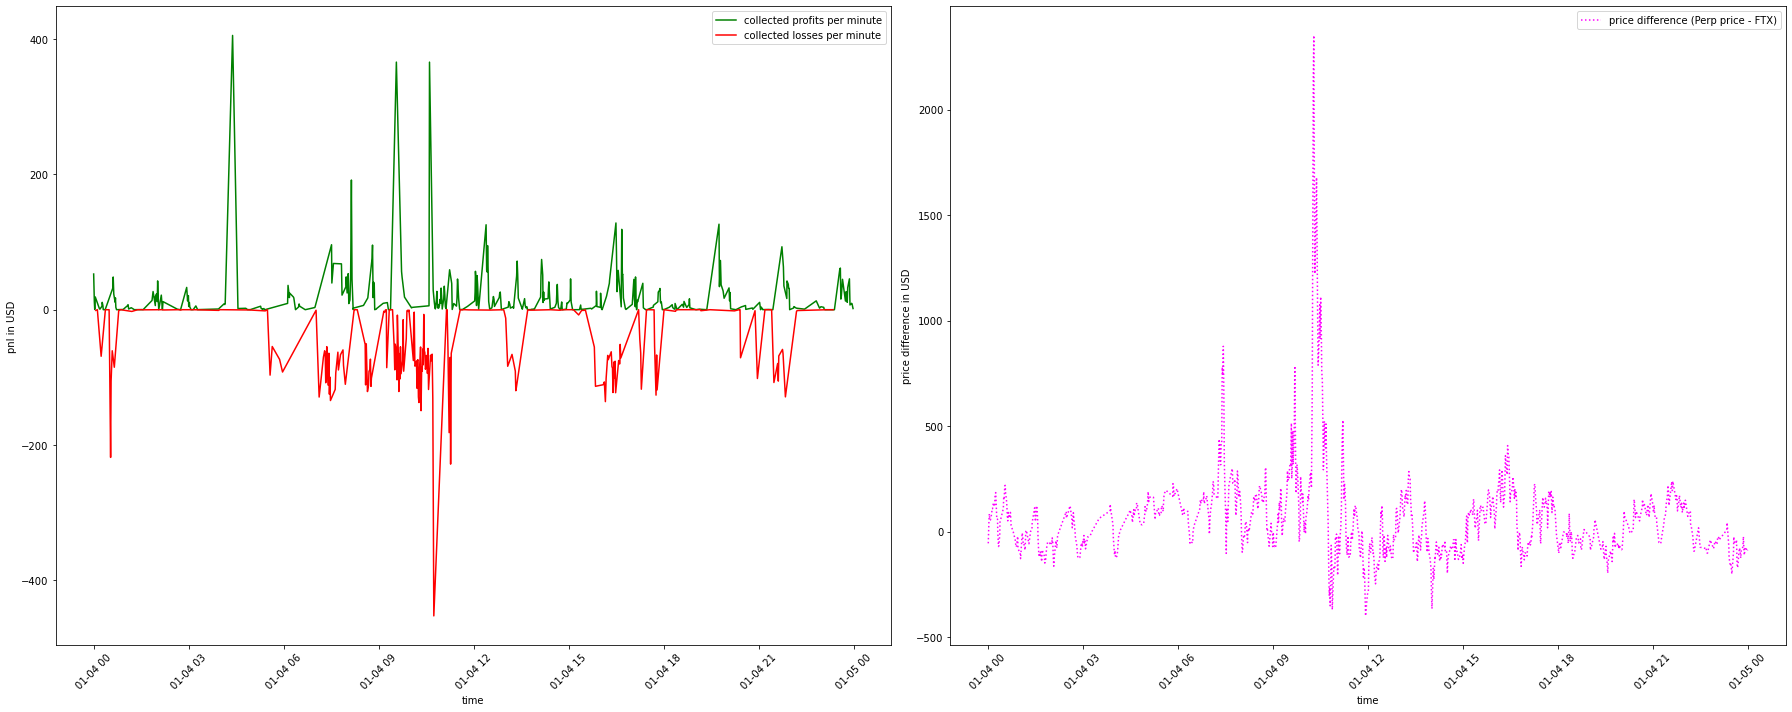

In [55]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 1, 5)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 1, 4))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 1, 4)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 1, 5))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 1, 5)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 1, 4))], 
                                  "BTC", separate_plots=True)

### February

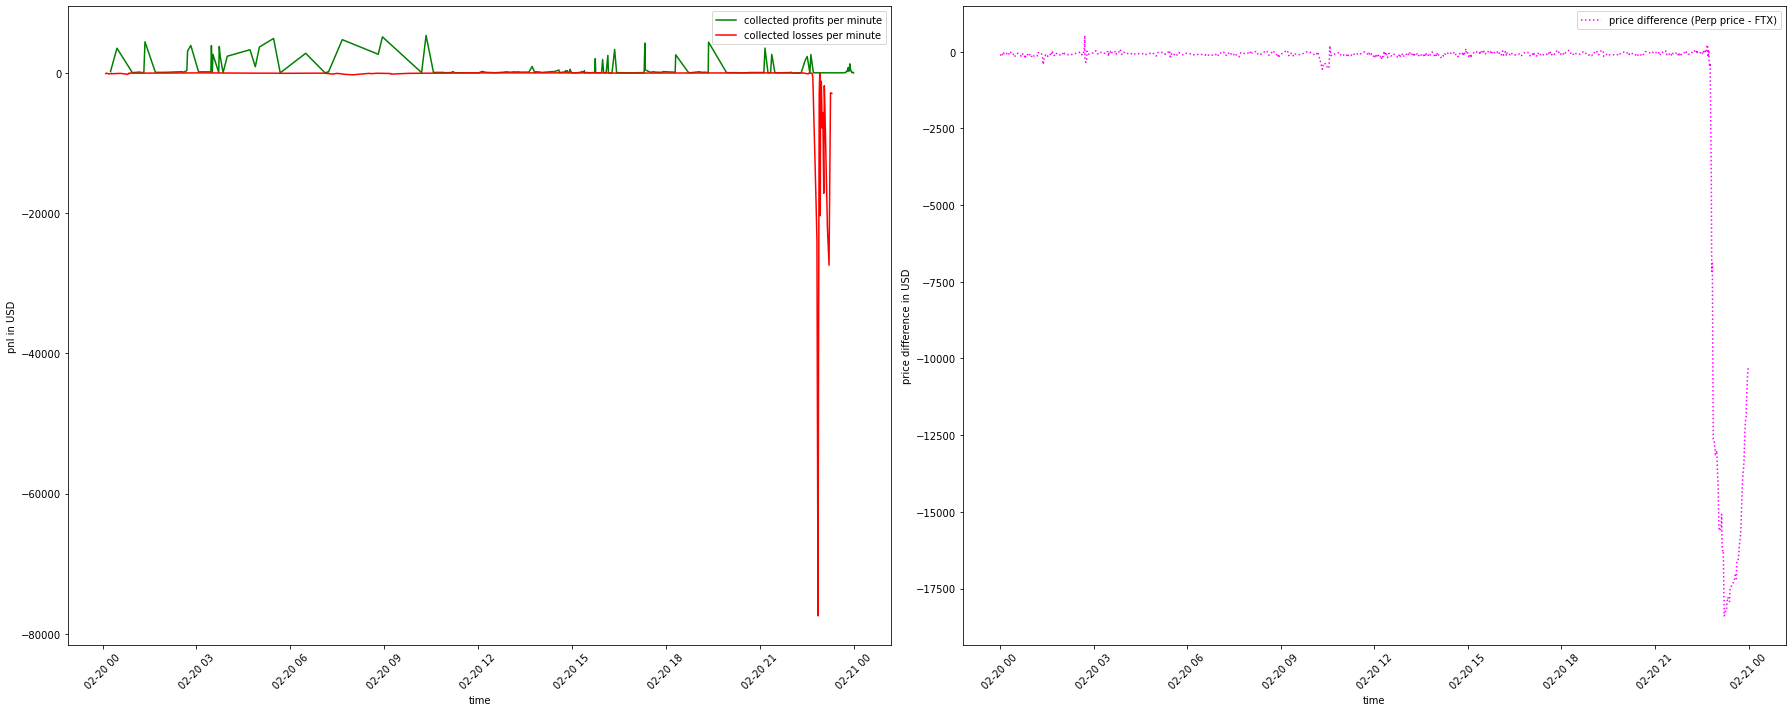

In [56]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 21)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 20))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 20)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 21))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 21)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 20))], 
                                  "BTC", separate_plots=True)

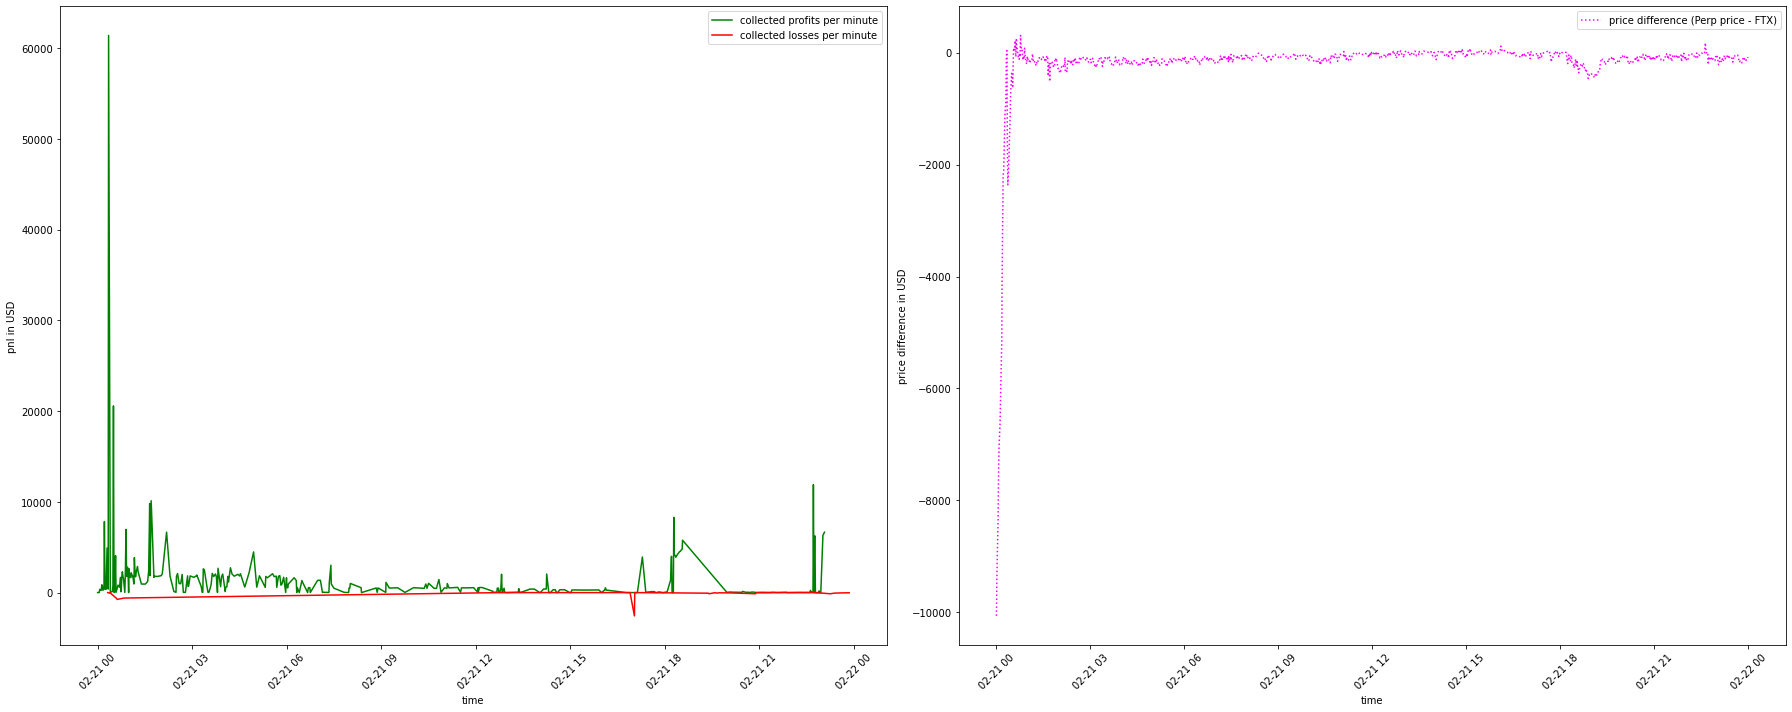

In [57]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 21))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 21)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 22))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 22)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 21))], 
                                  "BTC", separate_plots=True)

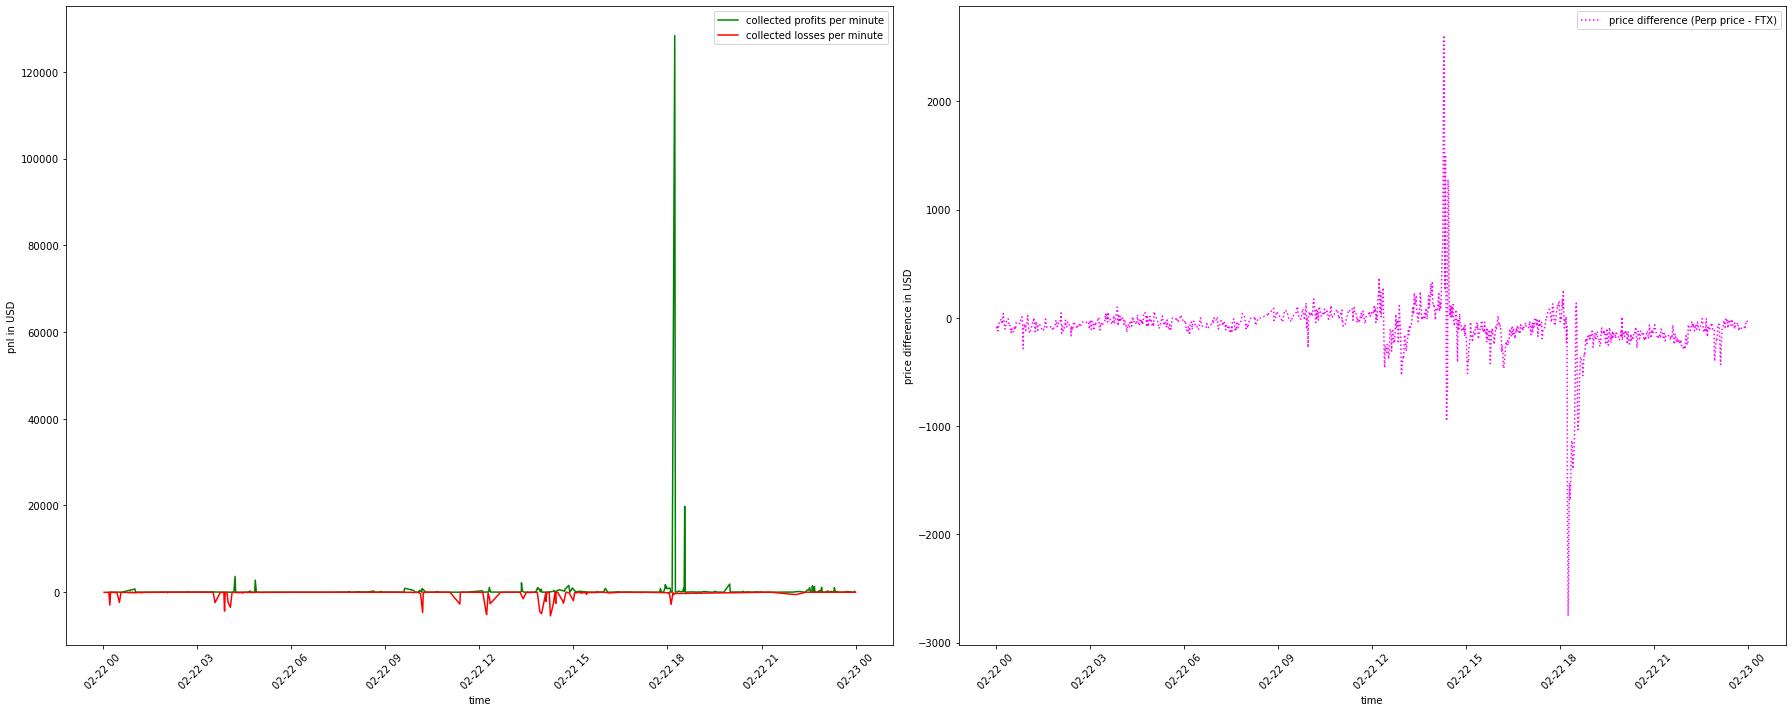

In [58]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 2, 23)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 2, 22))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 2, 22)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 2, 23))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 2, 23)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 2, 22))], 
                                  "BTC", separate_plots=True)

### March

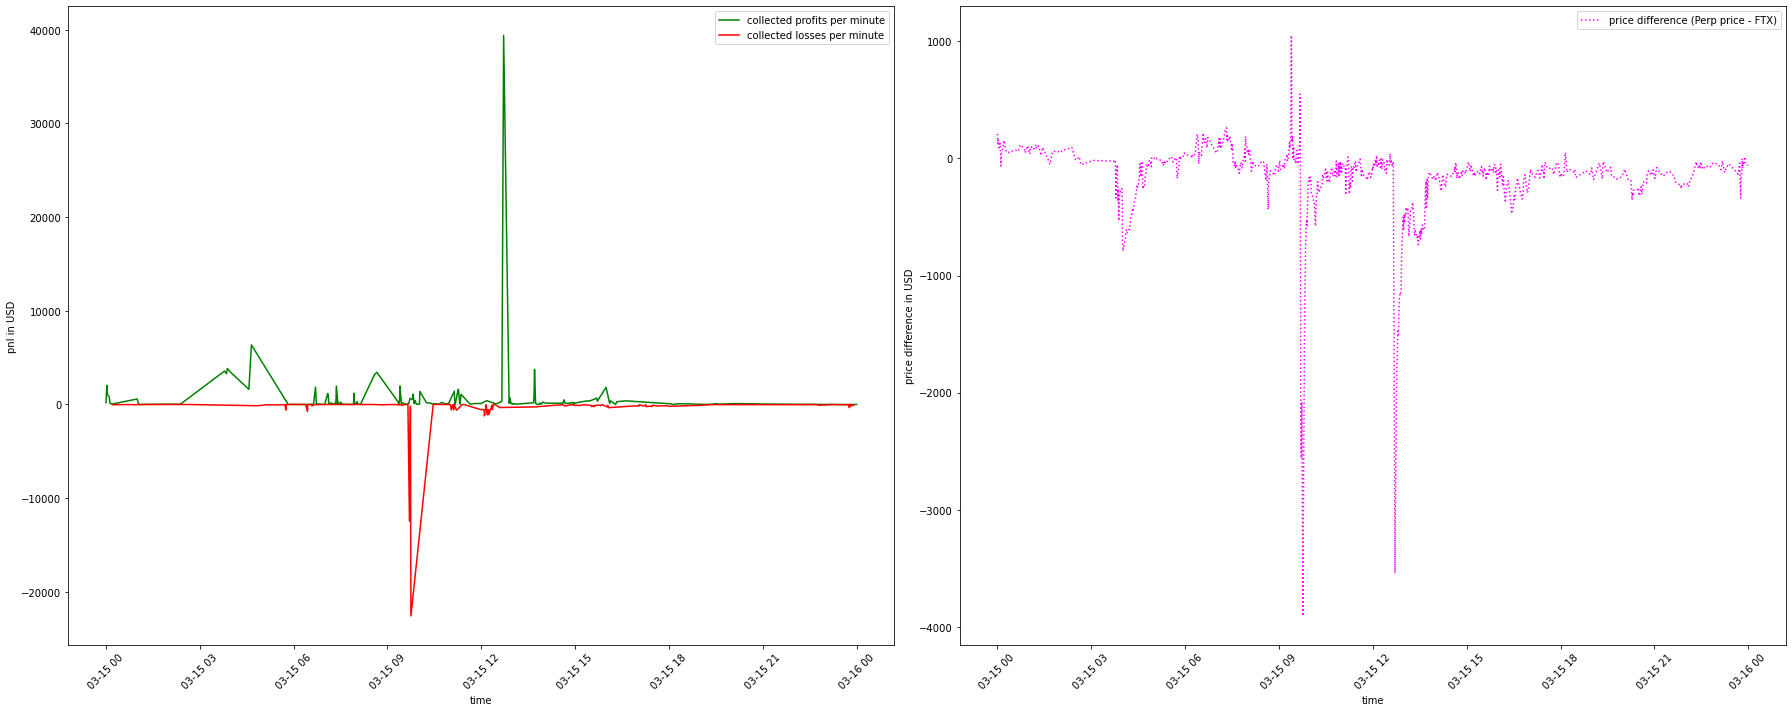

In [59]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 3, 16)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 3, 15))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 3, 15)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 3, 16))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 3, 16)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 3, 15))], 
                                  "BTC", separate_plots=True)

### April

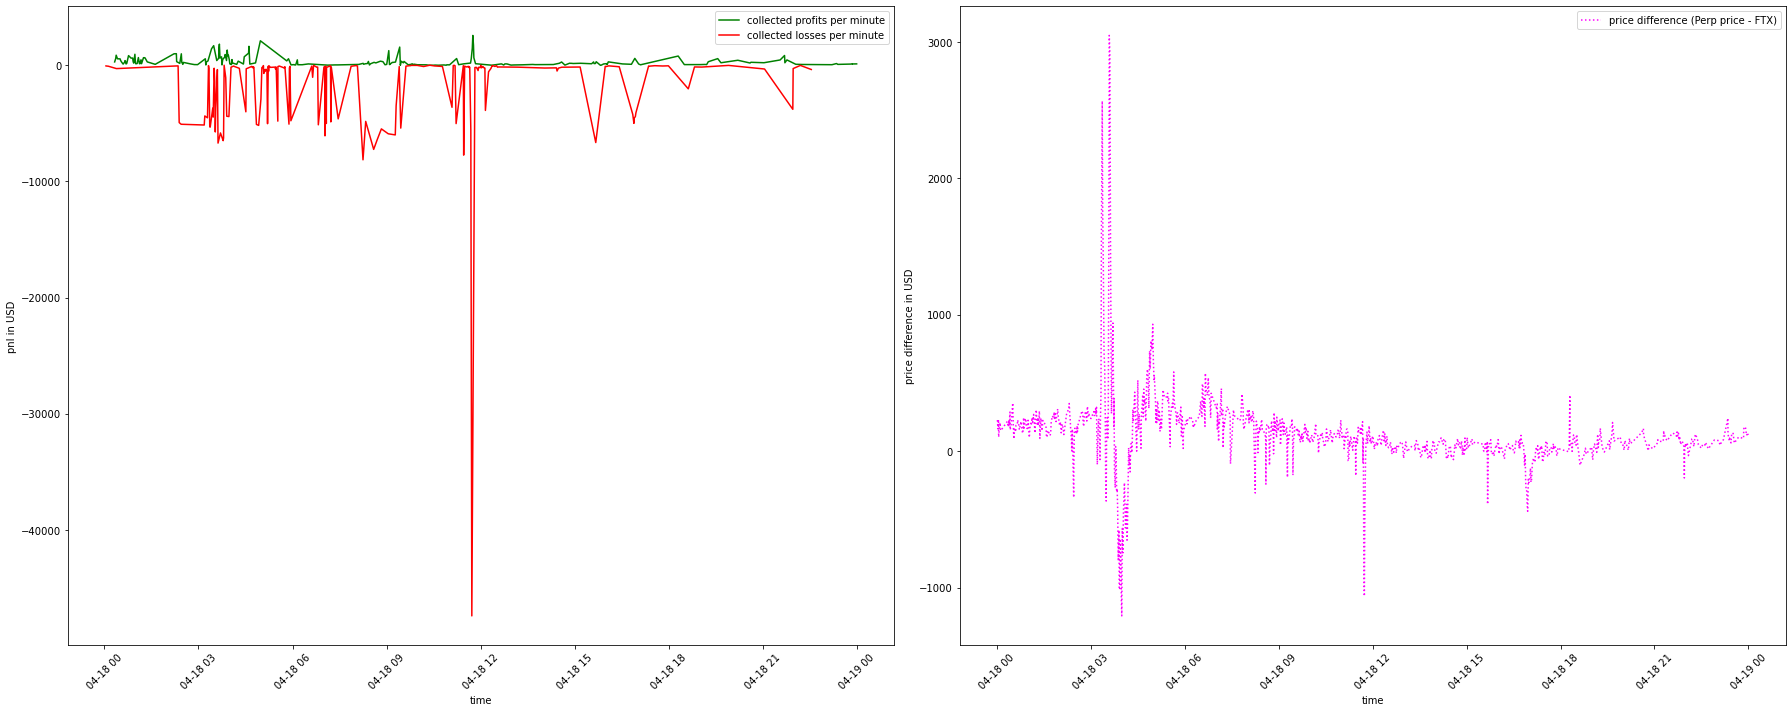

In [54]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 4, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 4, 18))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 4, 18)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 4, 19))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 4, 19)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 4, 18))], 
                                  "BTC", separate_plots=True)

### May

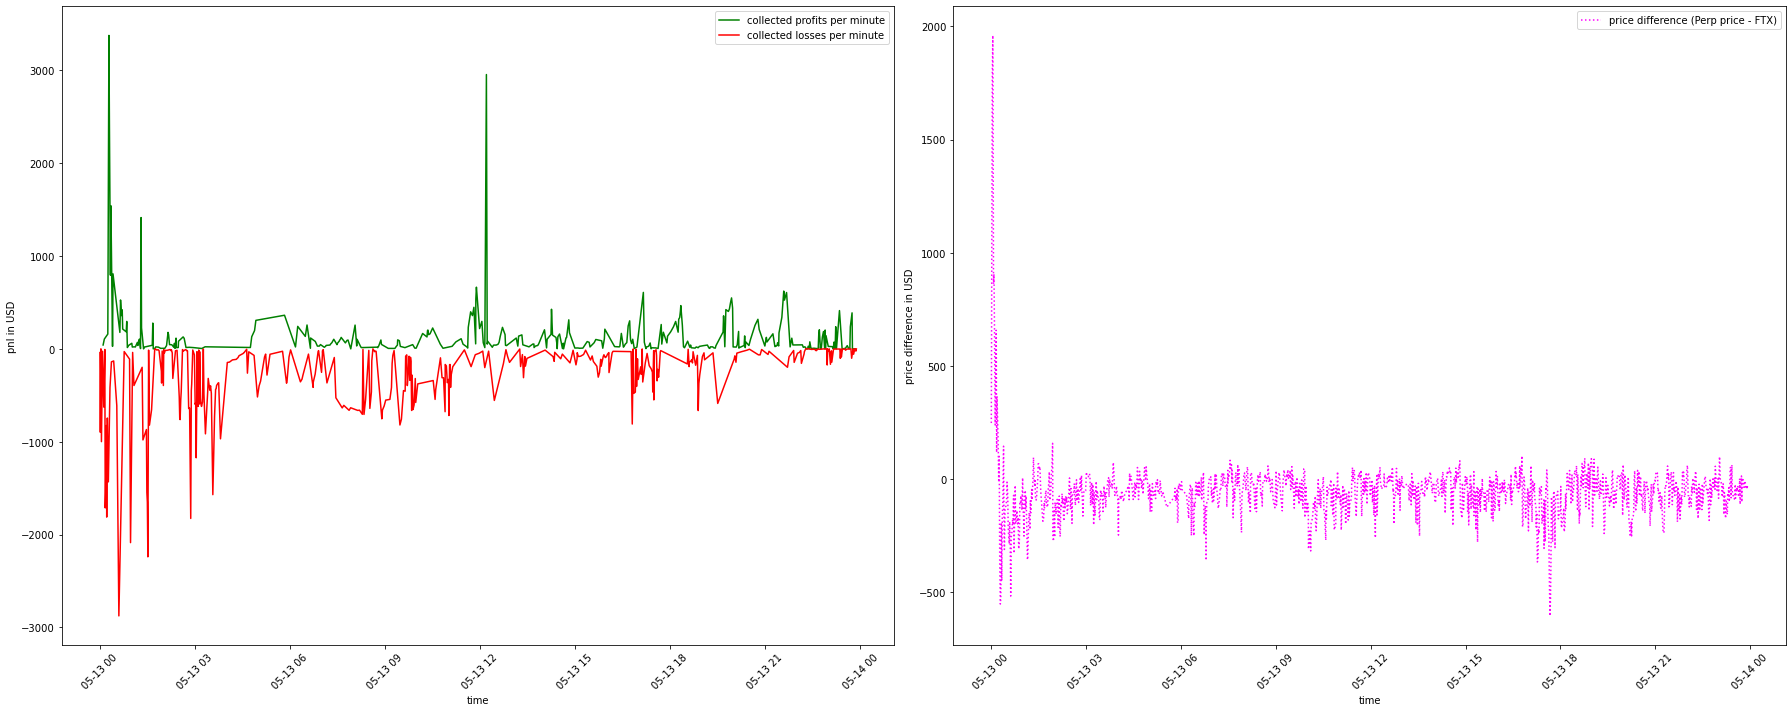

In [61]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 14)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 13))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 5, 13)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 5, 14))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 5, 14)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 5, 13))], 
                                  "BTC", separate_plots=True)

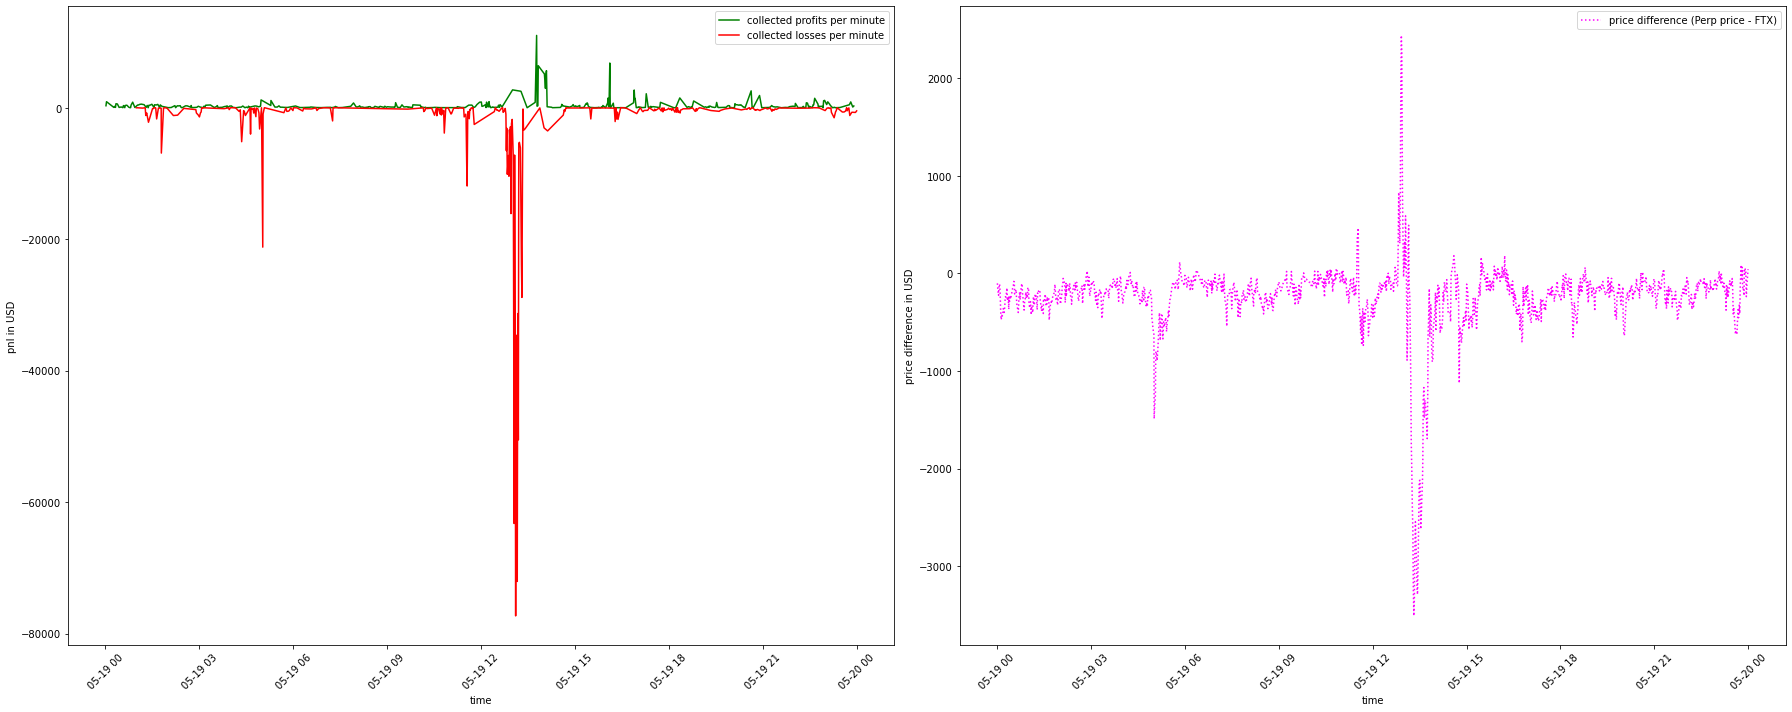

In [62]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 5, 19))], 
                                  "BTC", separate_plots=True)

### September

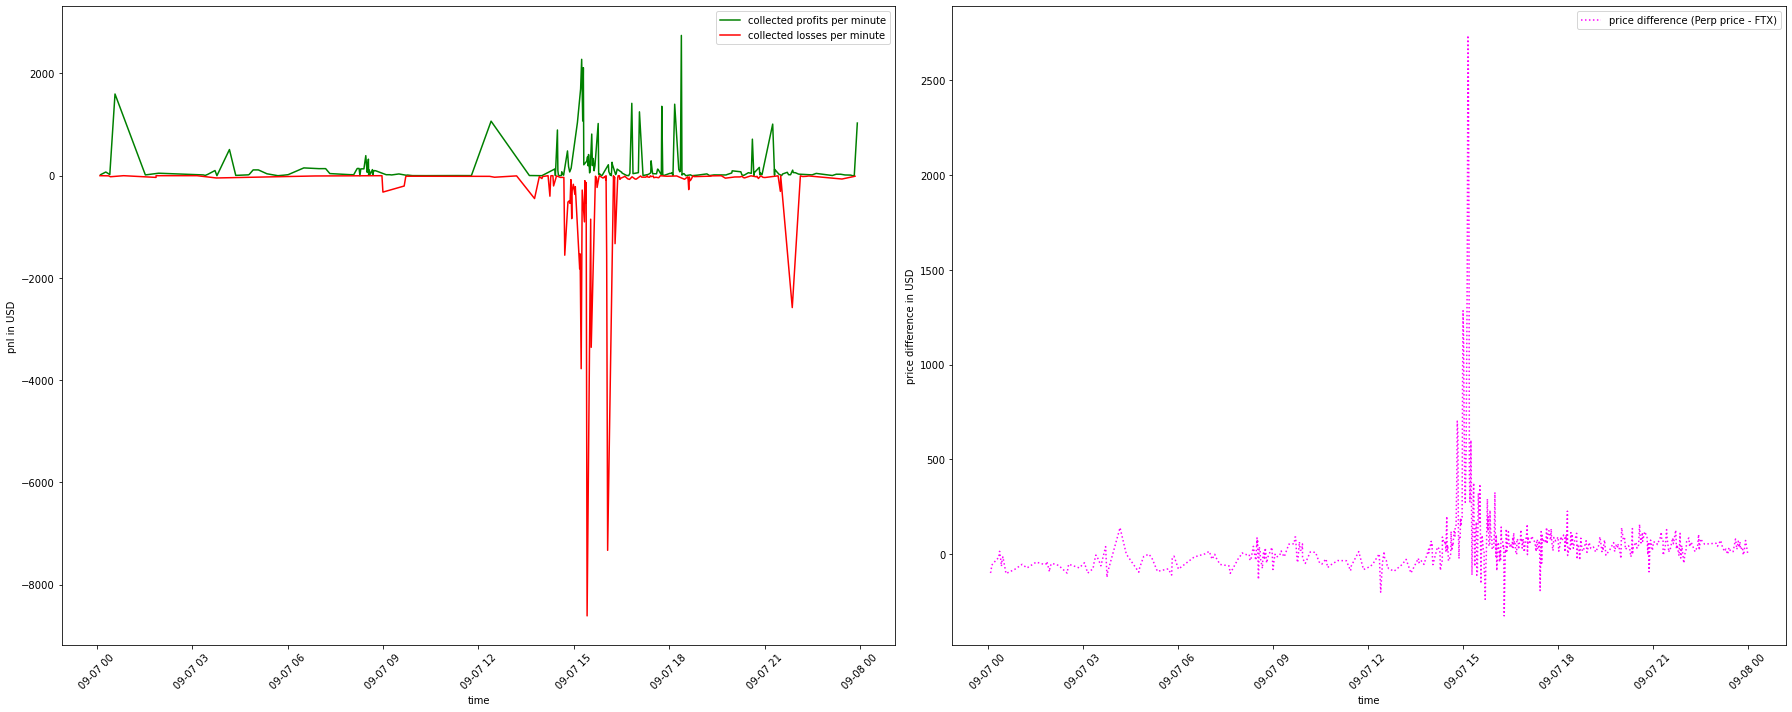

In [63]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 8)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 7))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 9, 7)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 9, 8))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 9, 8)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 9, 7))], 
                                  "BTC", separate_plots=True)

### October

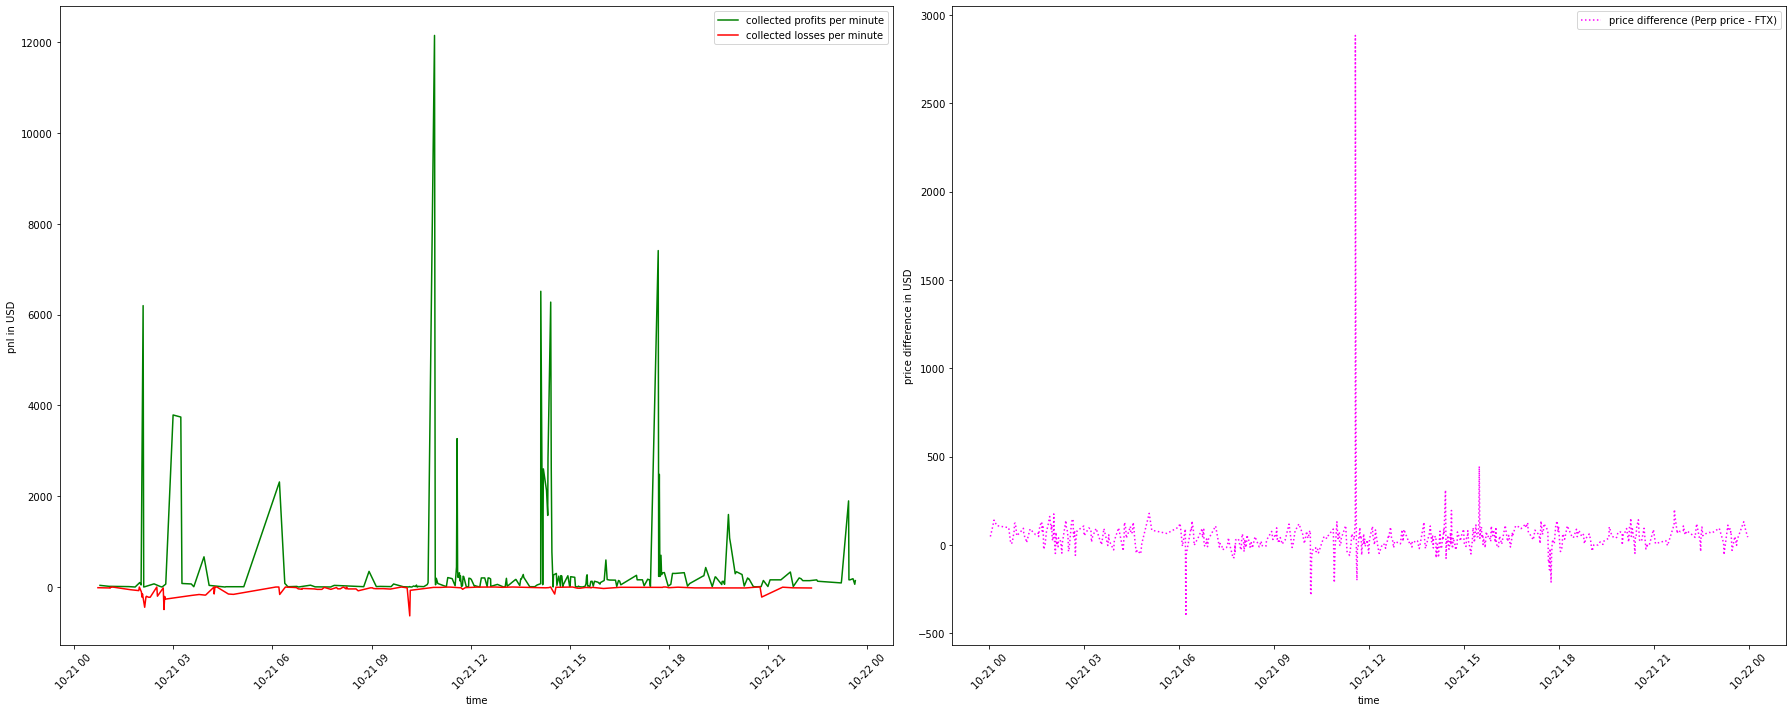

In [64]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 21))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 10, 21)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 10, 22))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 10, 22)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 10, 21))], 
                                  "BTC", separate_plots=True)

### December

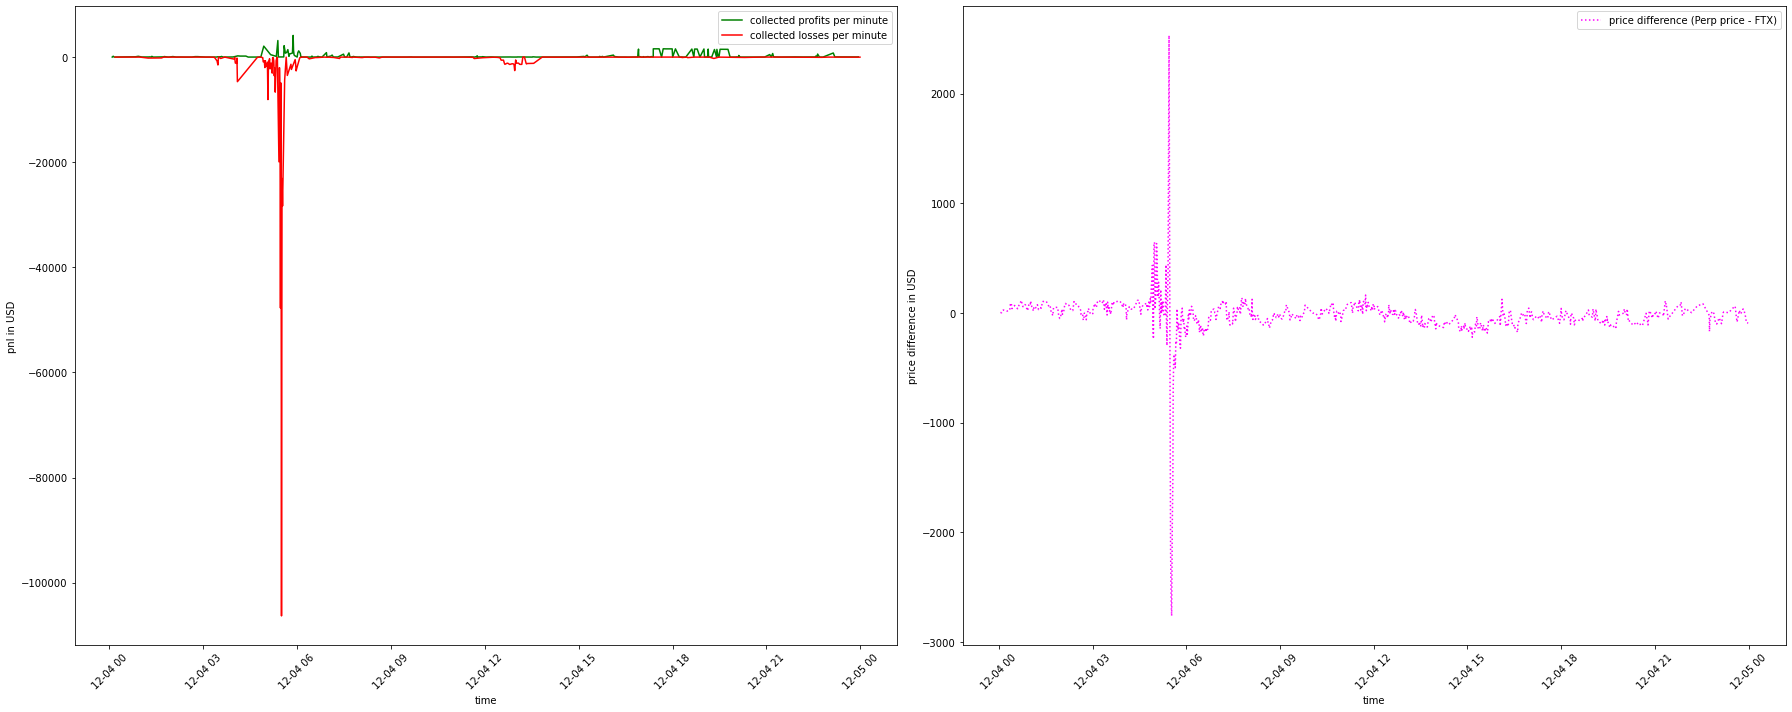

In [65]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "BTC/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 12, 5)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 12, 4))], 
                                  indexed_btc_ftx_price_df[(indexed_btc_ftx_price_df["datetime"] >= datetime(2021, 12, 4)) & 
                                                            (indexed_btc_ftx_price_df["datetime"] < datetime(2021, 12, 5))], 
                                  minutewise_high_low_price_btc[(minutewise_high_low_price_btc["time"] < datetime(2021, 12, 5)) & 
                                                                 (minutewise_high_low_price_btc["time"] >= datetime(2021, 12, 4))], 
                                  "BTC", separate_plots=True)

## ETH

### April

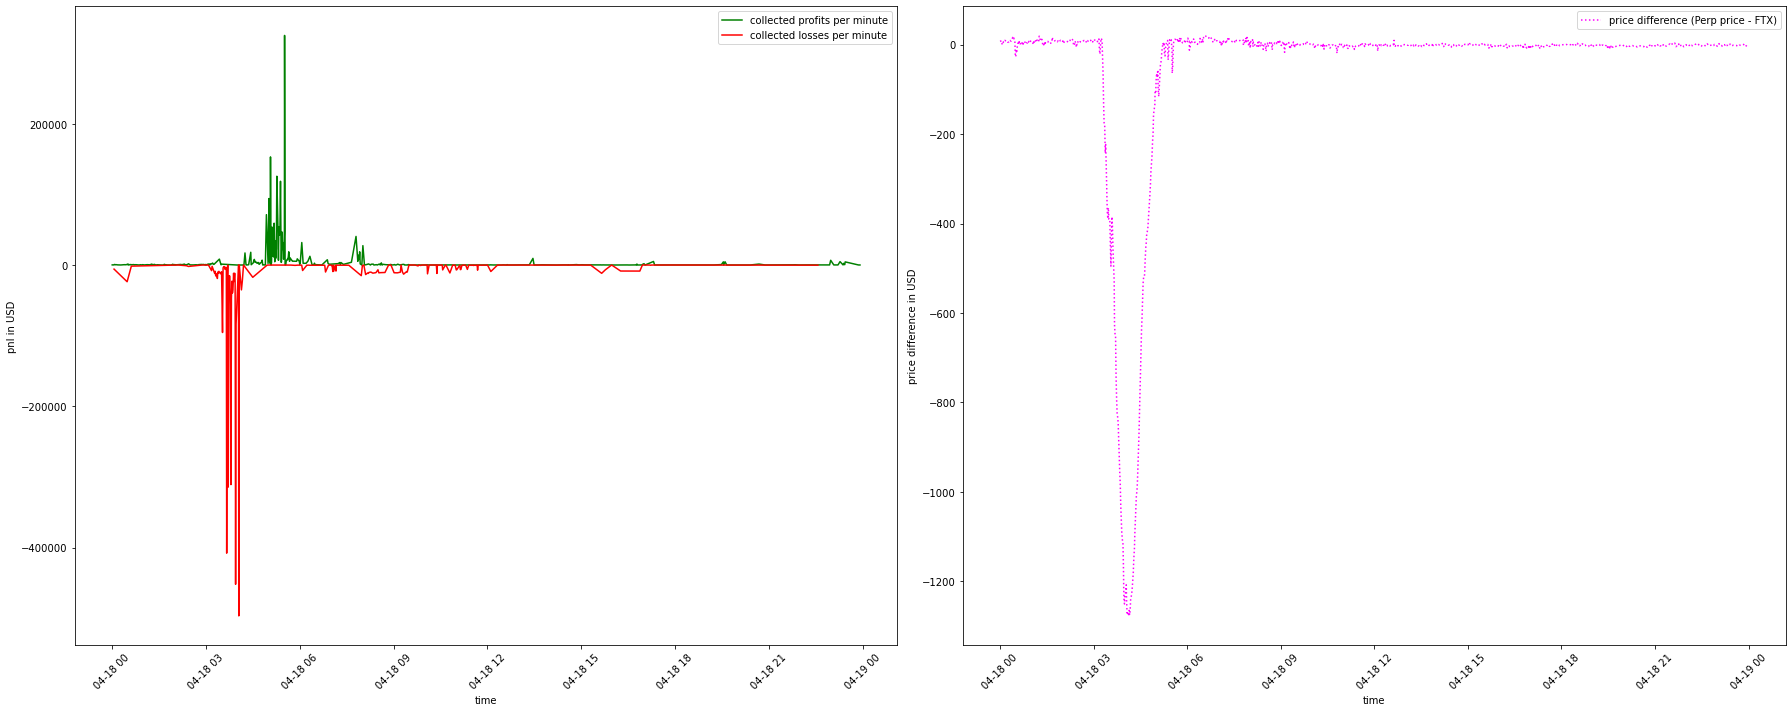

In [70]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 4, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 4, 18))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 4, 18)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 4, 19))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 4, 19)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 4, 18))], 
                                  "ETH", separate_plots=True)

### May

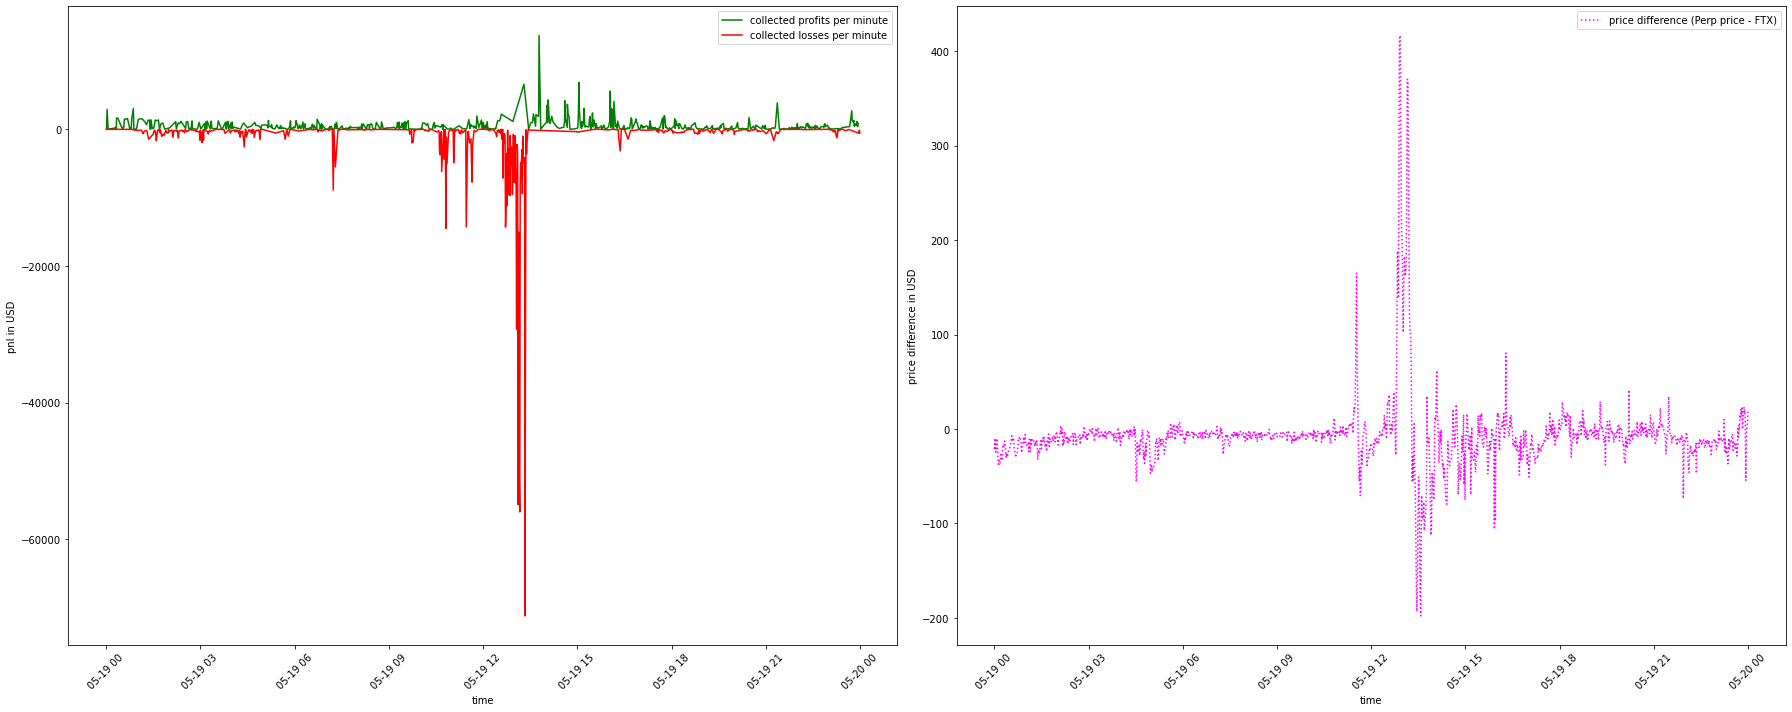

In [71]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 5, 19))], 
                                  "ETH", separate_plots=True)

### September

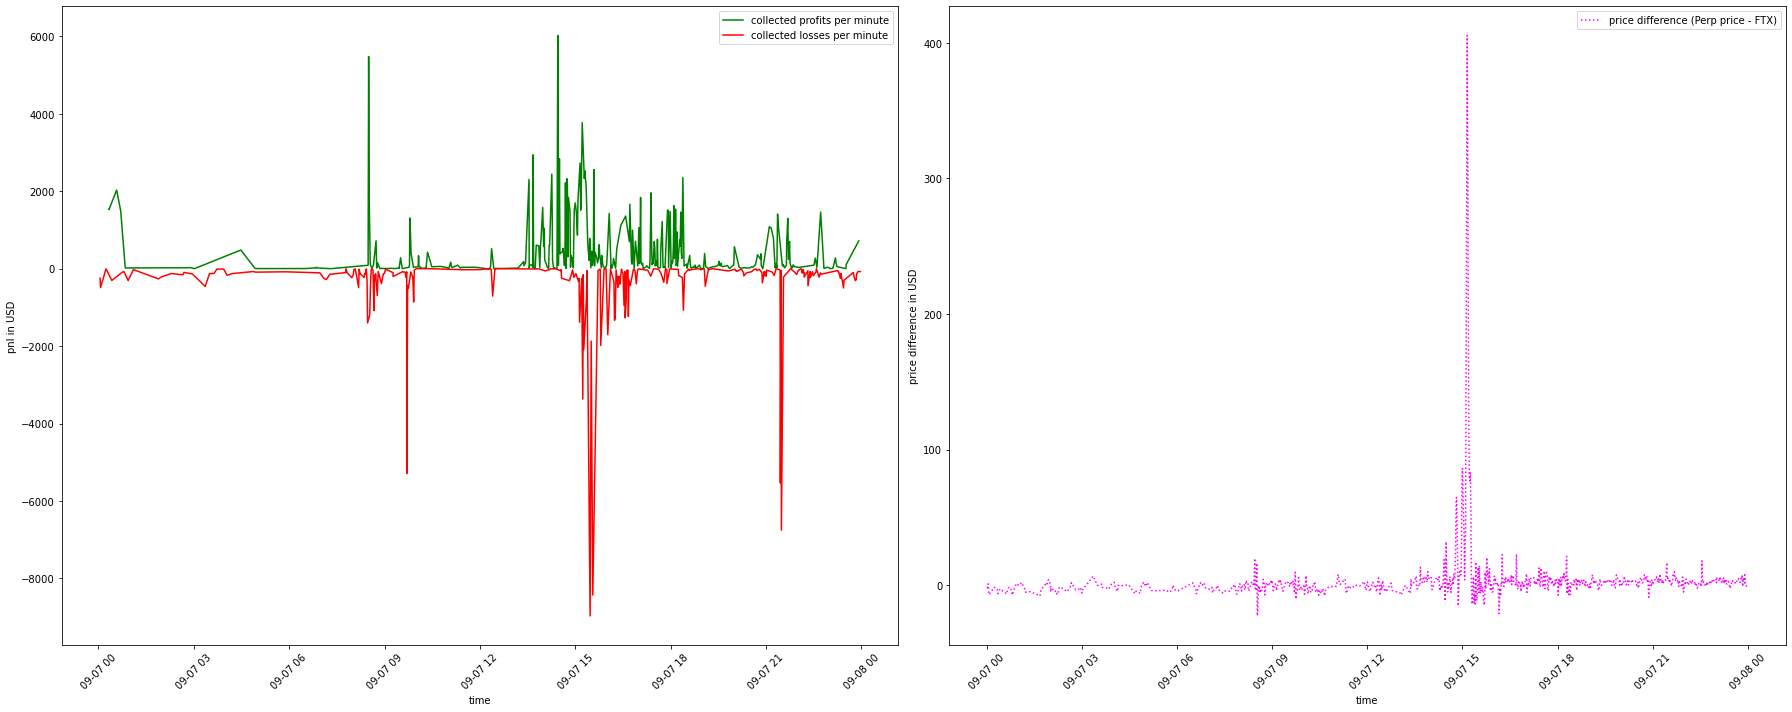

In [72]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 8)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 7))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 9, 7)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 9, 8))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 9, 8)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 9, 7))], 
                                  "ETH", separate_plots=True)

### October

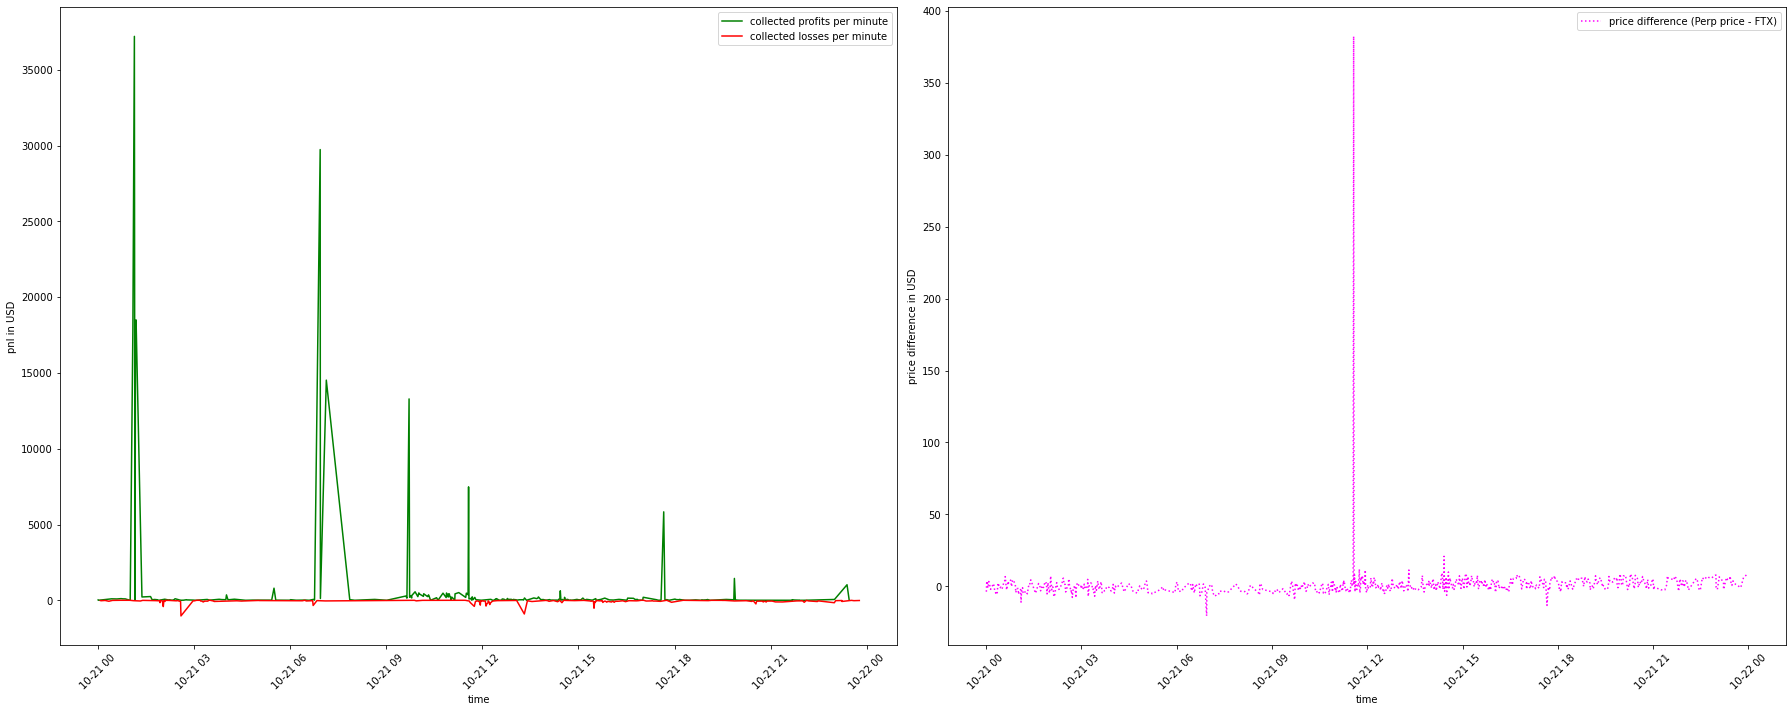

In [73]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "ETH/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 22)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 21))], 
                                  indexed_eth_ftx_price_df[(indexed_eth_ftx_price_df["datetime"] >= datetime(2021, 10, 21)) & 
                                                            (indexed_eth_ftx_price_df["datetime"] < datetime(2021, 10, 22))], 
                                  minutewise_high_low_price_eth[(minutewise_high_low_price_eth["time"] < datetime(2021, 10, 22)) & 
                                                                 (minutewise_high_low_price_eth["time"] >= datetime(2021, 10, 21))], 
                                  "ETH", separate_plots=True)

## PERP

### May

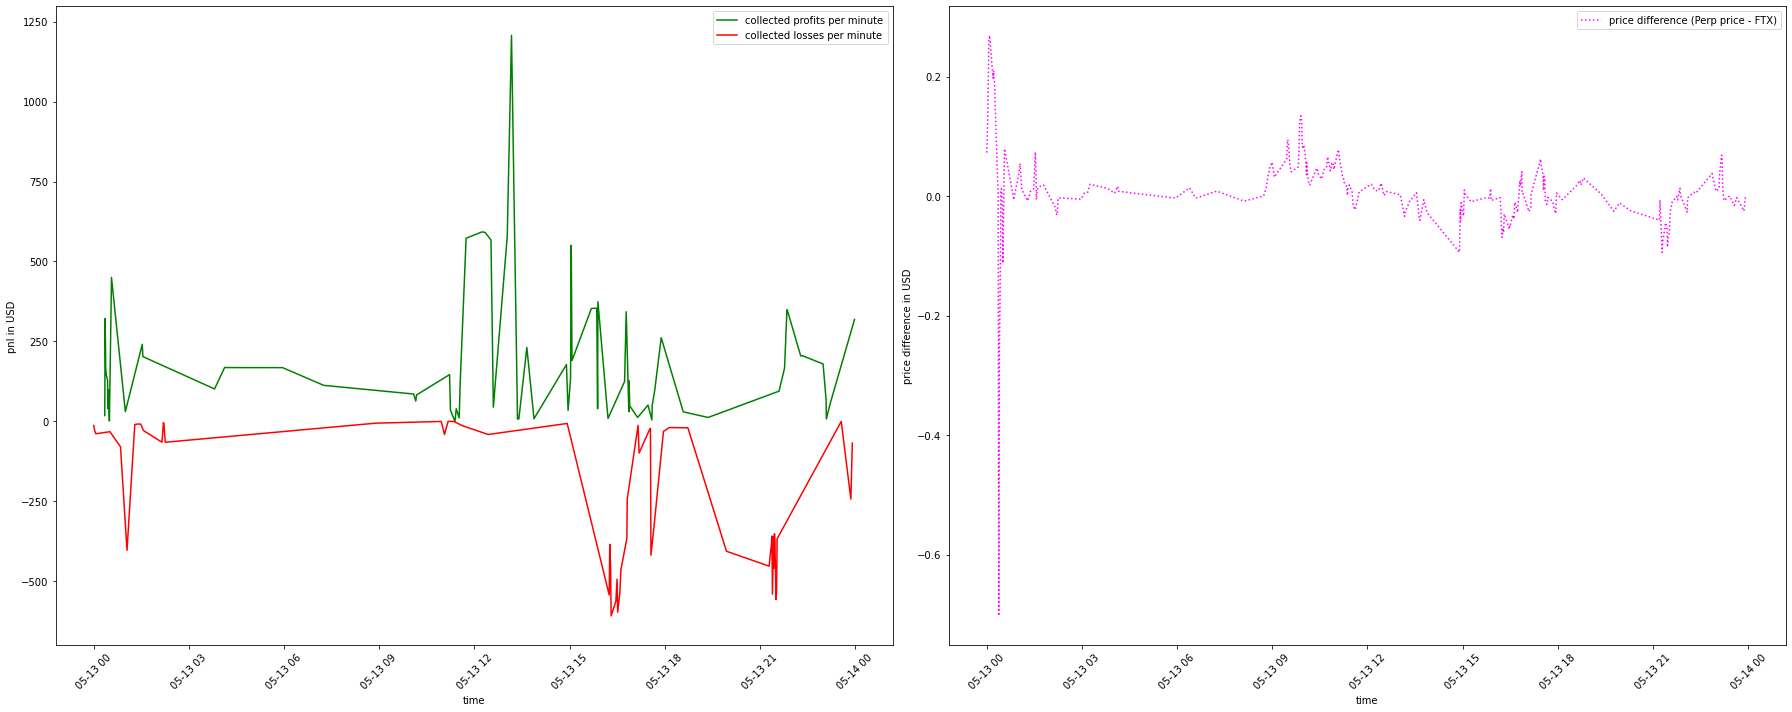

In [78]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 14)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 13))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 13)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 14))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 14)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 13))], 
                                  "PERP", separate_plots=True)

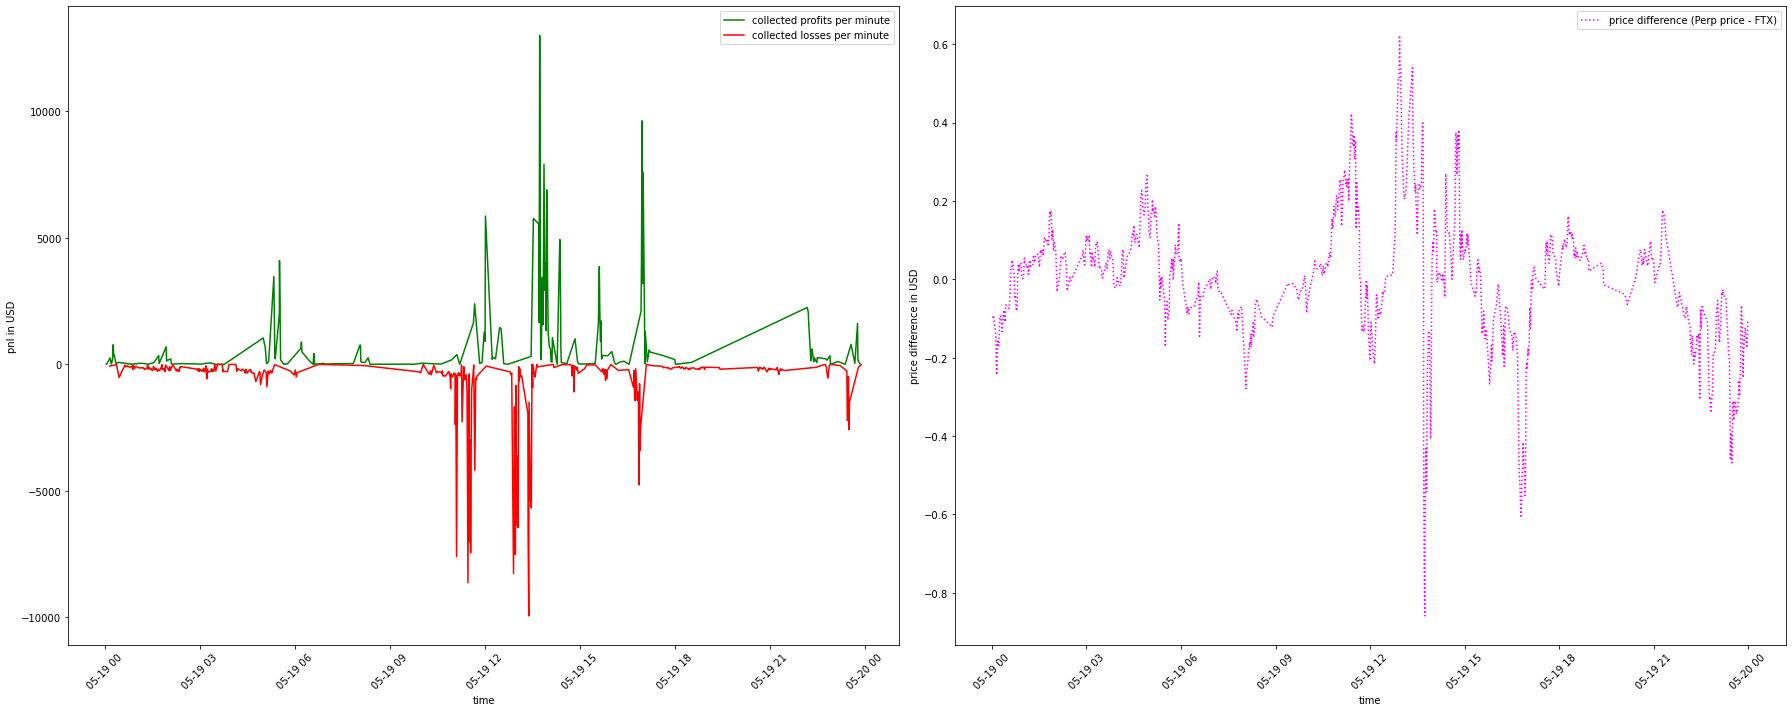

In [79]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 20)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 19))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 19)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 20))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 20)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 19))], 
                                  "PERP", separate_plots=True)

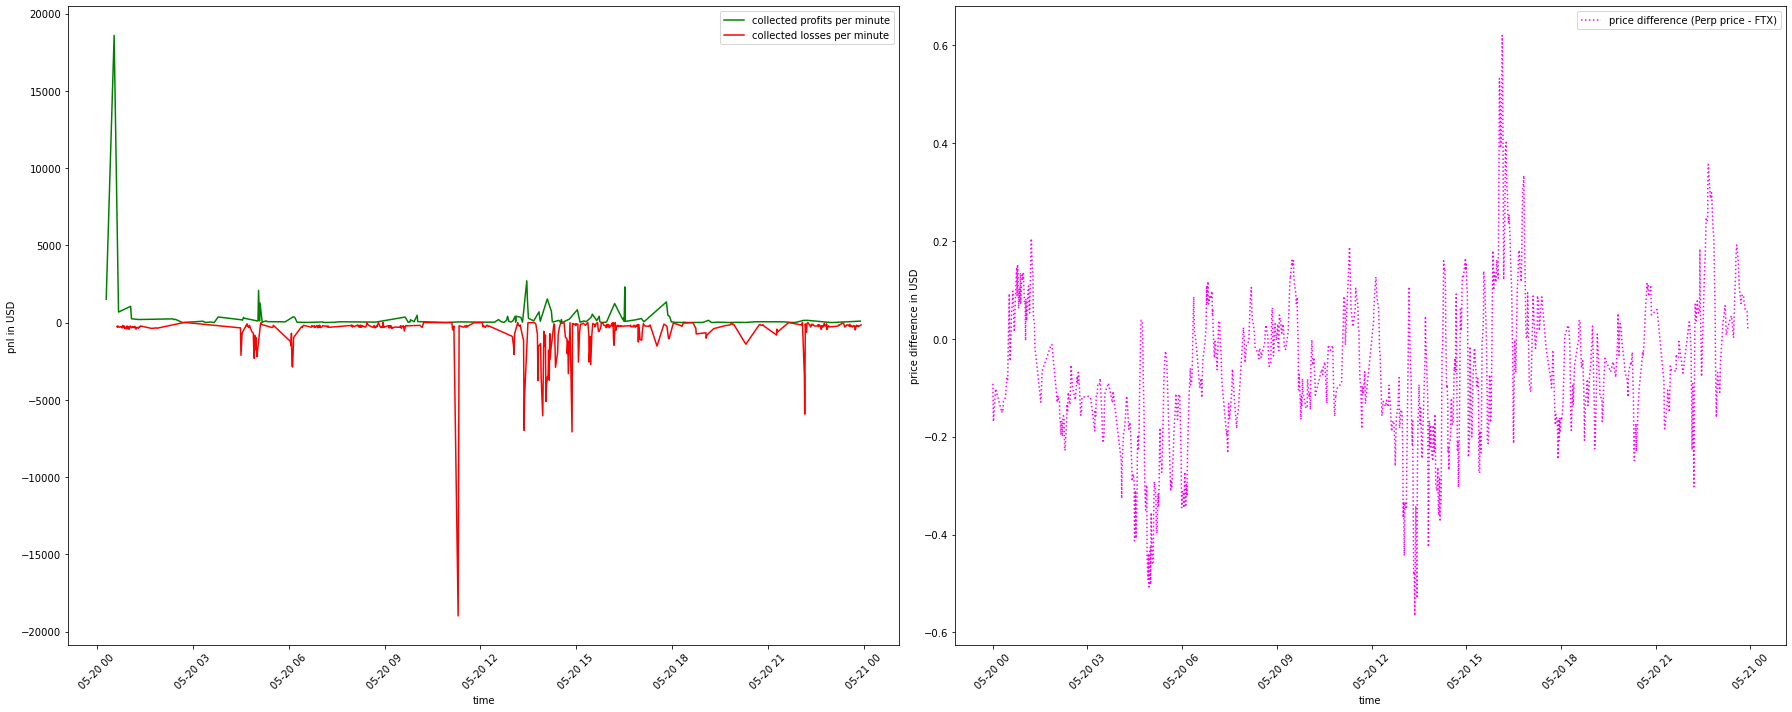

In [80]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 5, 21)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 5, 20))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 5, 20)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 5, 21))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 5, 21)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 5, 20))], 
                                  "PERP", separate_plots=True)

### August

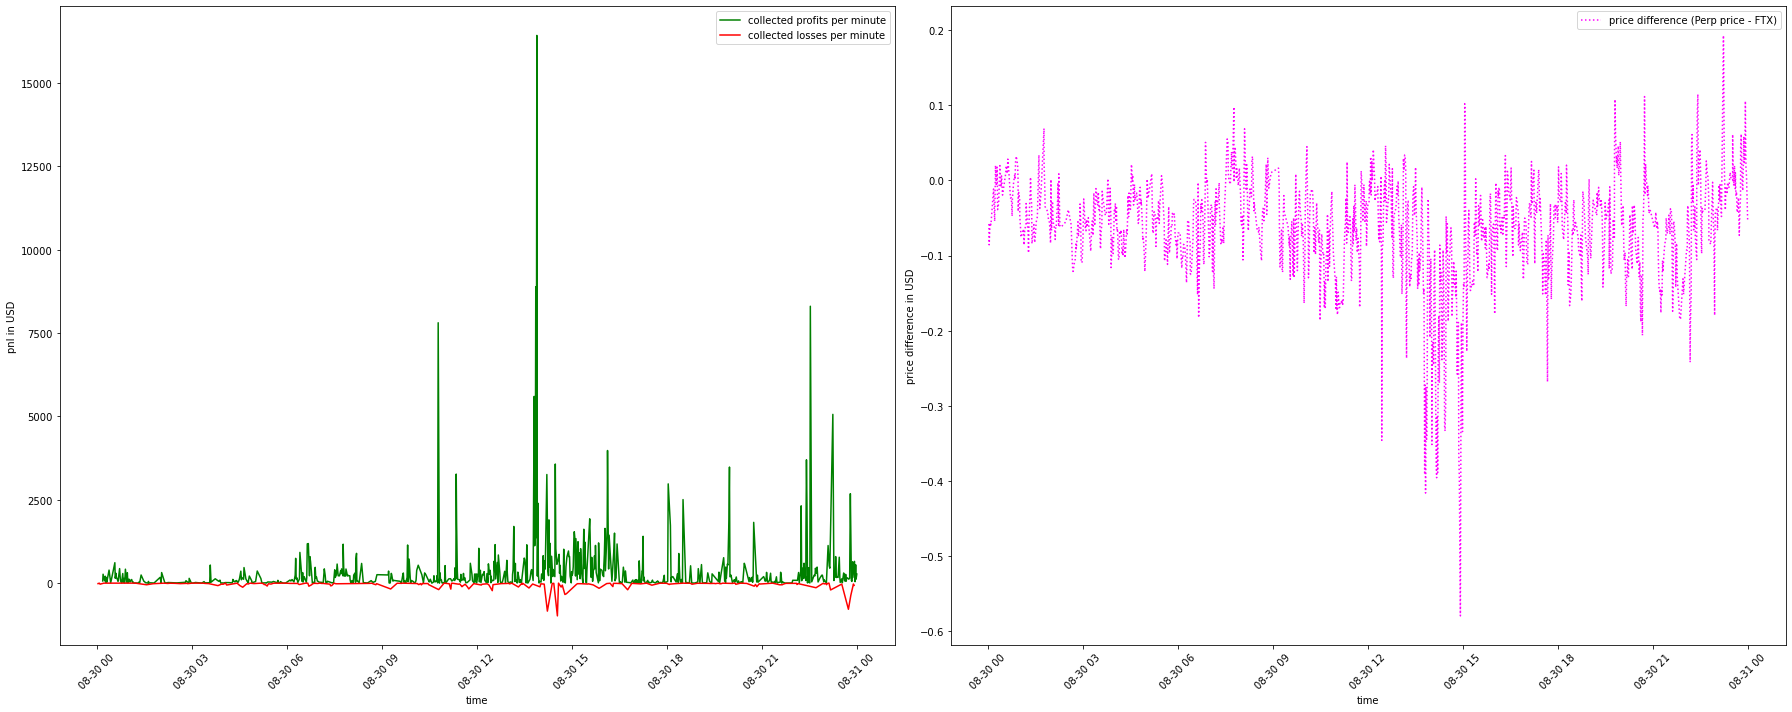

In [81]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 8, 31)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 8, 30))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 8, 30)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 8, 31))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 8, 31)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 8, 30))], 
                                  "PERP", separate_plots=True)

### September

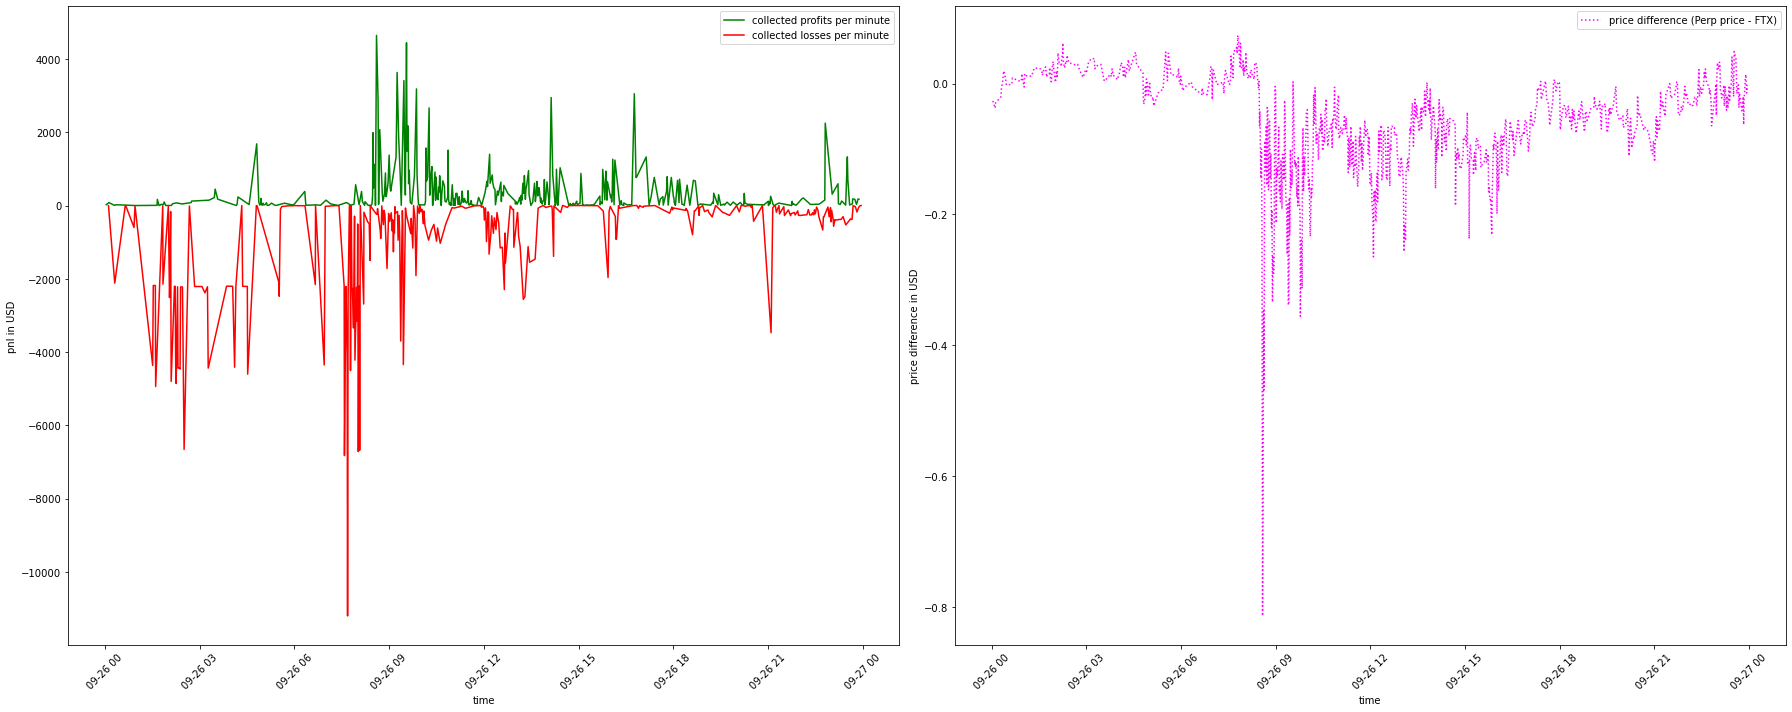

In [82]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 9, 27)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 9, 26))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 9, 26)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 9, 27))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 9, 27)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 9, 26))], 
                                  "PERP", separate_plots=True)

### October

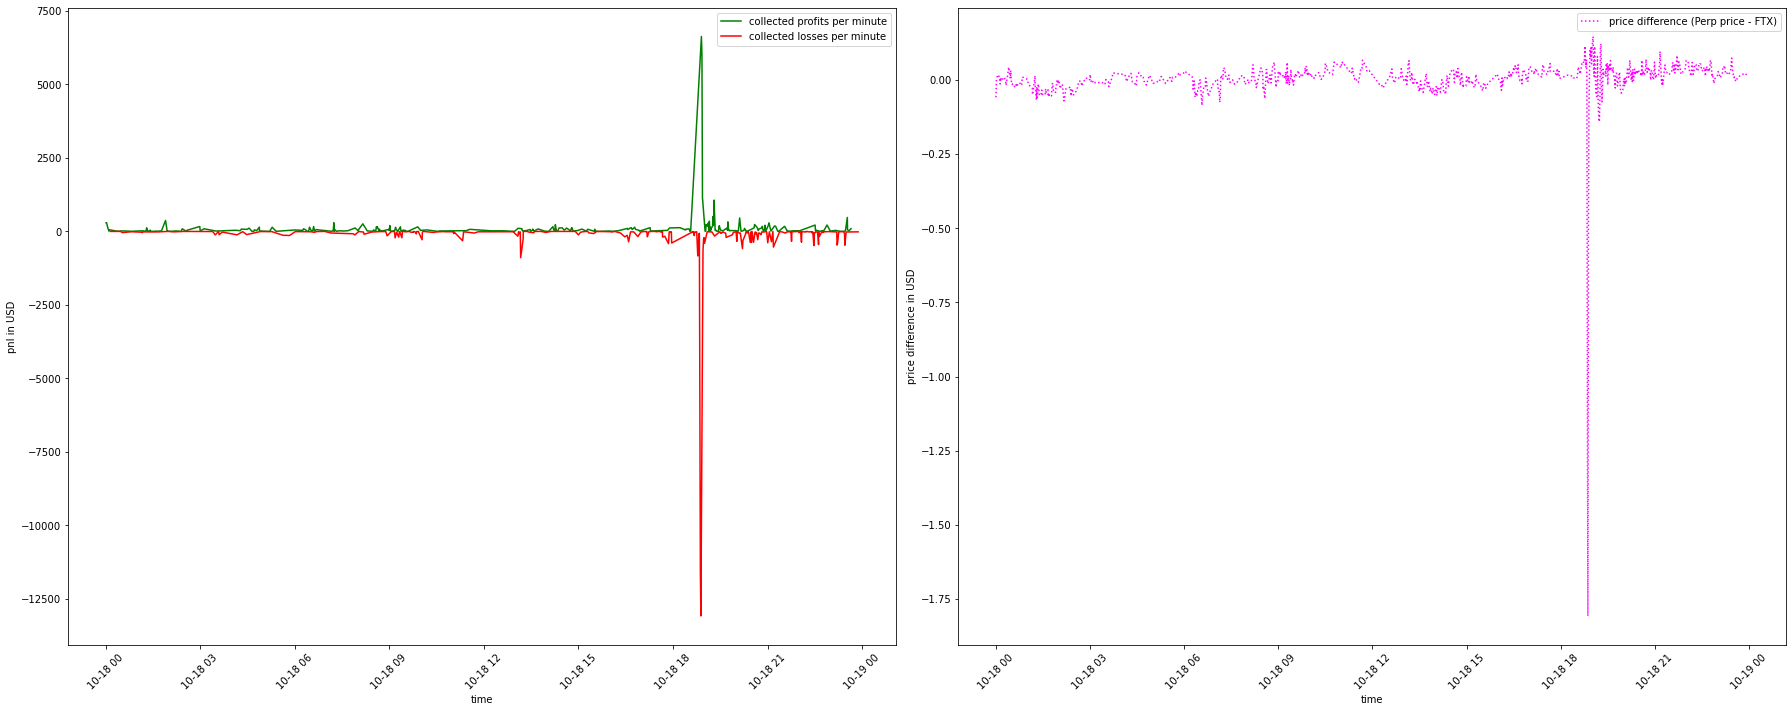

In [83]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 10, 19)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 10, 18))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 10, 18)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 10, 19))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 10, 19)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 10, 18))], 
                                  "PERP", separate_plots=True)

### November

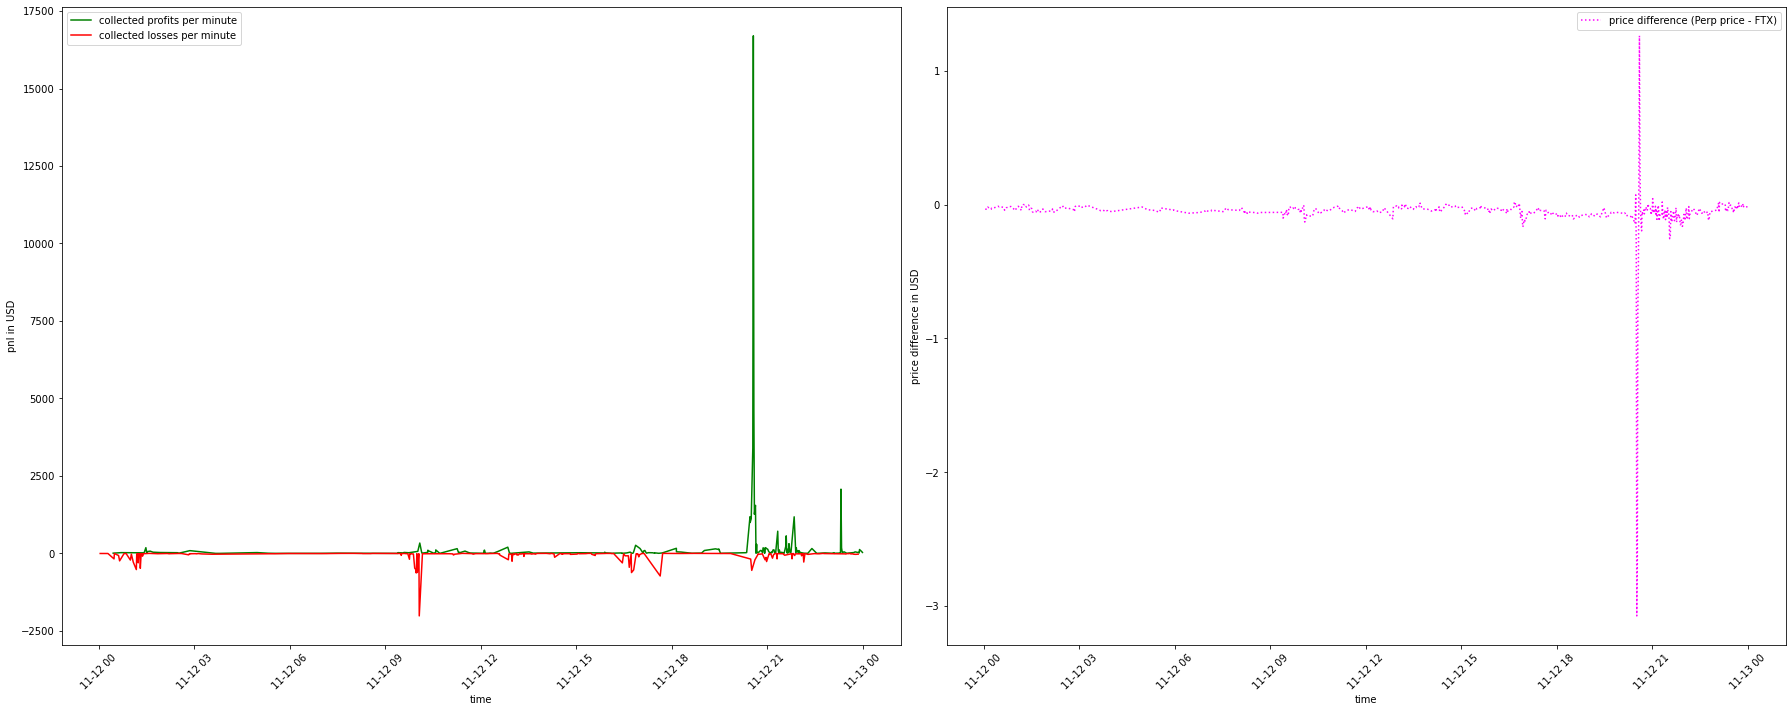

In [84]:
plot_minutewise_pnl_to_mean_price_difference(changes_opens_closes_2021_df[(changes_opens_closes_2021_df["amm_name"] == "PERP/USDC") &
                                                                          (changes_opens_closes_2021_df["time"] < datetime(2021, 11, 13)) &
                                                                          (changes_opens_closes_2021_df["time"] >= datetime(2021, 11, 12))], 
                                  indexed_perp_ftx_price_df[(indexed_perp_ftx_price_df["datetime"] >= datetime(2021, 11, 12)) & 
                                                            (indexed_perp_ftx_price_df["datetime"] < datetime(2021, 11, 13))], 
                                  minutewise_high_low_price_perp[(minutewise_high_low_price_perp["time"] < datetime(2021, 11, 13)) & 
                                                                 (minutewise_high_low_price_perp["time"] >= datetime(2021, 11, 12))], 
                                  "PERP", separate_plots=True)